---
# Setup

* imports, 
* global constants (paths, time format, order of conditions)

---

In [1]:
# Imports and untilities from functions.ipynb

%run functions.ipynb

---
# Load Data

* load result set (experiment only, omit training data)
* convert date time
* compute durations
* compute condition-based index
---

In [2]:
data_complete = pd.read_csv(rf'{export_data}results_experiment_valid.csv', sep=";")

display(data_complete)

,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,TrialNumber,CleanedUpInteractionStart_DT,CleanedUpInteractionEnd_DT,ResultNumberDifference,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition
0,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,0,2022-08-01 14:14:05.504,2022-08-01 14:15:18.527,0,0,True,True,78.538,73.023,2
1,0,2022-08-01T14:16:08.915Z,No Feedback,2022-08-01T14:16:03.467Z,3,165,"[122, 147, 165, 150, 129, 138, 149]",2,3,165,...,1,2022-08-01 14:15:26.143,2022-08-01 14:16:00.890,0,0,True,True,40.671,34.747,3
2,0,2022-08-01T14:17:10.611Z,No Feedback,2022-08-01T14:17:06.246Z,5,154,"[148, 130, 142, 149, 154, 131, 147]",2,4,154,...,2,2022-08-01 14:16:10.883,2022-08-01 14:17:05.397,0,-1,False,True,57.331,54.514,4
3,0,2022-08-01T14:18:09.619Z,No Feedback,2022-08-01T14:18:05.670Z,3,164,"[141, 132, 164, 110, 152, 147, 154]",2,3,164,...,3,2022-08-01 14:17:11.970,2022-08-01 14:18:04.603,0,0,True,True,55.058,52.633,5
4,0,2022-08-01T14:19:06.811Z,No Feedback,2022-08-01T14:19:02.997Z,7,154,"[142, 148, 140, 143, 144, 132, 154]",2,7,154,...,4,2022-08-01 14:18:11.962,2022-08-01 14:19:02.010,0,0,True,True,53.376,50.048,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,3,2022-08-23T11:27:13.692Z,No Feedback,2022-08-23T11:27:09.628Z,7,159,"[153, 122, 128, 144, 140, 154, 159]",23,7,159,...,79,2022-08-23 11:26:33.878,2022-08-23 11:27:08.564,0,0,True,True,37.272,34.686,501
1760,3,2022-08-23T11:27:49.516Z,No Feedback,2022-08-23T11:27:45.172Z,5,157,"[146, 142, 133, 156, 157, 128, 138]",23,5,157,...,80,2022-08-23 11:27:15.467,2022-08-23 11:27:44.655,0,0,True,True,31.479,29.188,502
1761,3,2022-08-23T11:28:51.795Z,No Feedback,2022-08-23T11:28:46.148Z,6,148,"[139, 140, 143, 147, 142, 148, 141]",23,6,148,...,81,2022-08-23 11:27:50.891,2022-08-23 11:28:45.618,0,0,True,True,56.632,54.727,503
1762,3,2022-08-23T11:29:32.908Z,No Feedback,2022-08-23T11:29:29.764Z,1,152,"[152, 139, 138, 134, 145, 144, 148]",23,1,152,...,82,2022-08-23 11:28:54.105,2022-08-23 11:29:28.940,0,0,True,True,37.968,34.835,504


---
# Duration

* group trial duration by condition and trial index (in Block)
* compute descriptive statistics
* plots
* export for spss
---

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
countCondition,,,,
2,78.538,32.656,51.120,42.380
3,40.671,26.159,25.597,30.935
4,57.331,27.000,22.368,41.030
5,55.058,29.663,37.073,26.608
6,53.376,41.215,25.239,28.872
...,...,...,...,...
501,37.272,39.888,44.240,36.208
502,31.479,31.216,29.975,16.143
503,56.632,27.088,47.016,19.224


BlockId,0,1,2,3
Condition,,,,
No Feedback,42.371563,38.044595,44.467560,36.777932
Tactile Feedback,47.089061,39.698643,36.261881,35.934548
Visual Feedback,40.390971,34.355838,30.984136,29.236917
Combined Feedback,40.856159,35.381167,32.137095,32.469095


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,441.000000,441.000000,441.000000,441.000000
mean,40.082073,41.117834,33.693841,34.095451
std,13.964367,14.711166,10.604536,12.338806
min,10.936000,13.384000,16.760000,15.567000
5%,24.239000,24.151000,20.846000,20.872000
10%,26.429000,26.518000,22.368000,22.639000
25%,30.527000,30.359000,26.616000,25.870000
50%,36.535000,37.600000,31.319000,31.832000
75%,46.175000,47.447000,38.095000,39.320000
90%,58.056000,61.022000,48.762000,47.879000


,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback,DurationMS
count,441.000000,441.000000,441.000000,441.000000,1764.00000
mean,40.082073,41.117834,33.693841,34.095451,37.24730
std,13.964367,14.711166,10.604536,12.338806,13.42179
min,10.936000,13.384000,16.760000,15.567000,10.93600
5%,24.239000,24.151000,20.846000,20.872000,NaN
10%,26.429000,26.518000,22.368000,22.639000,NaN
25%,30.527000,30.359000,26.616000,25.870000,28.19050
50%,36.535000,37.600000,31.319000,31.832000,33.89600
75%,46.175000,47.447000,38.095000,39.320000,43.15300
90%,58.056000,61.022000,48.762000,47.879000,NaN


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
TrialId,,,,
0,40.780667,44.436952,41.413238,42.240190
1,41.481048,39.714952,34.077286,37.314048
2,43.365286,38.450143,33.246048,35.658571
3,40.810571,41.932524,34.885048,38.065381
4,42.557476,45.744000,35.976667,41.511143
5,36.171333,41.344143,35.665714,36.199190
6,35.078571,39.010143,33.284238,34.626429
7,39.552000,41.280571,33.706238,34.747810
8,36.222238,40.897857,34.403238,31.920619


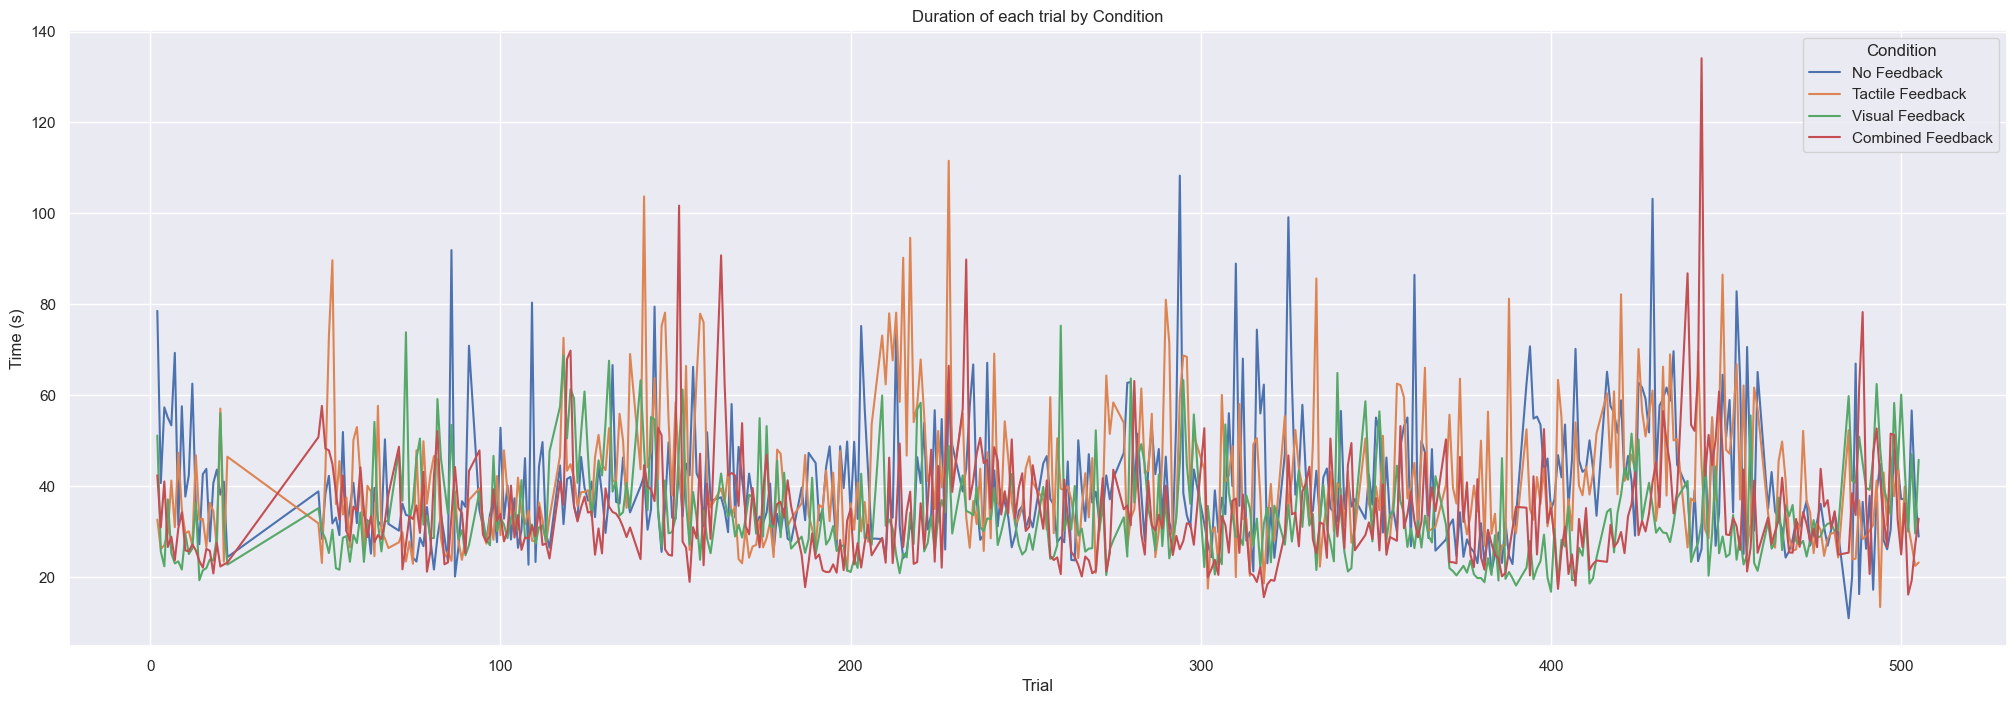

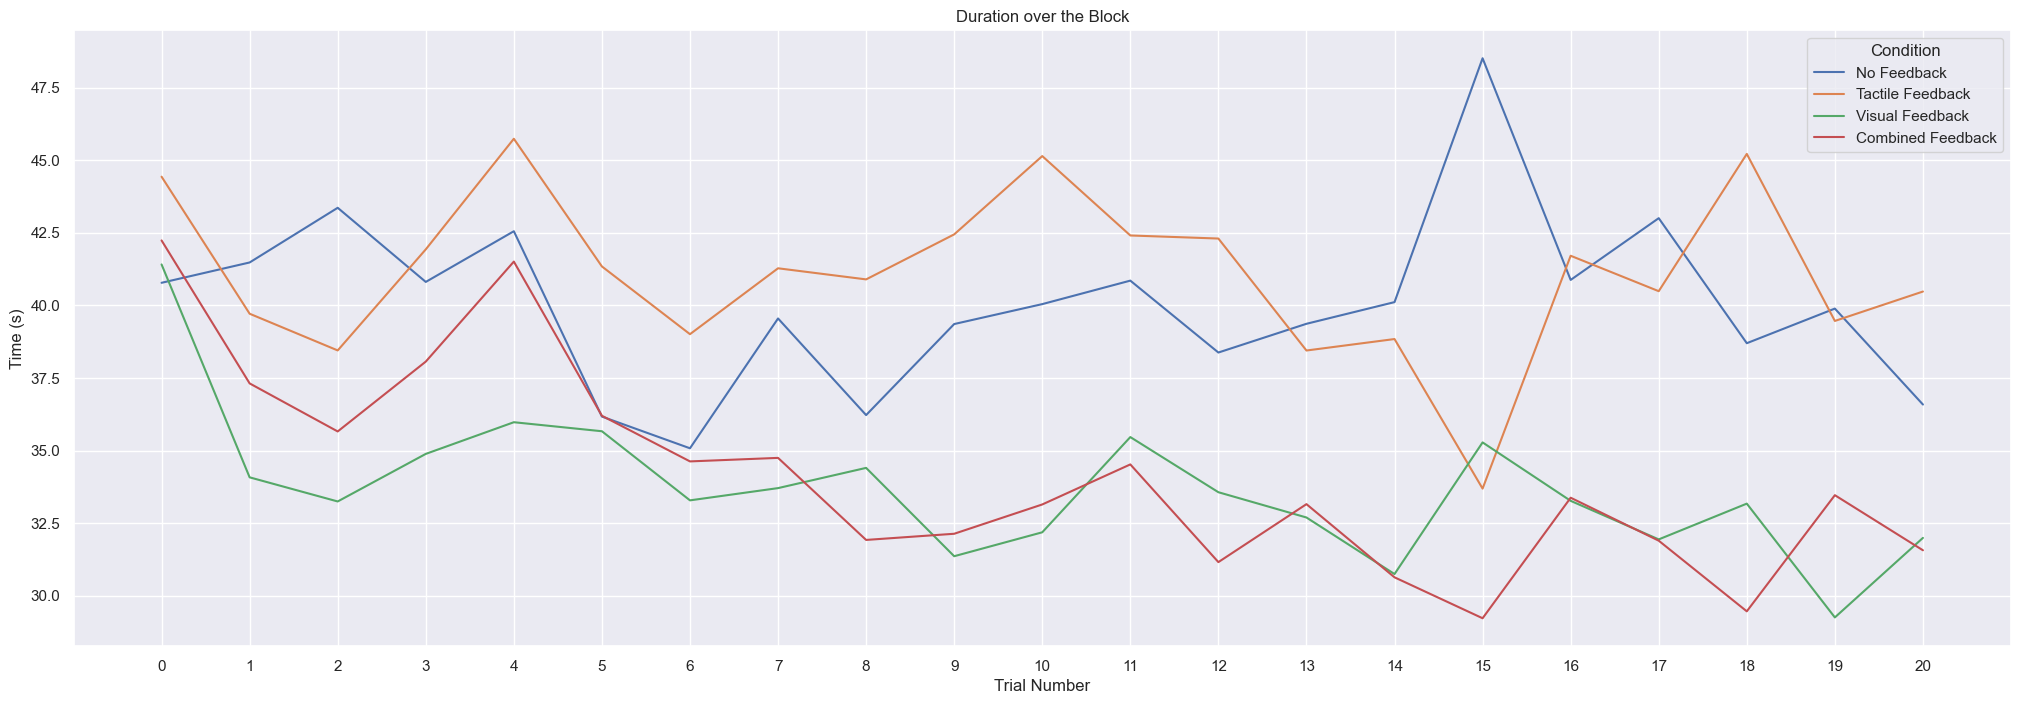

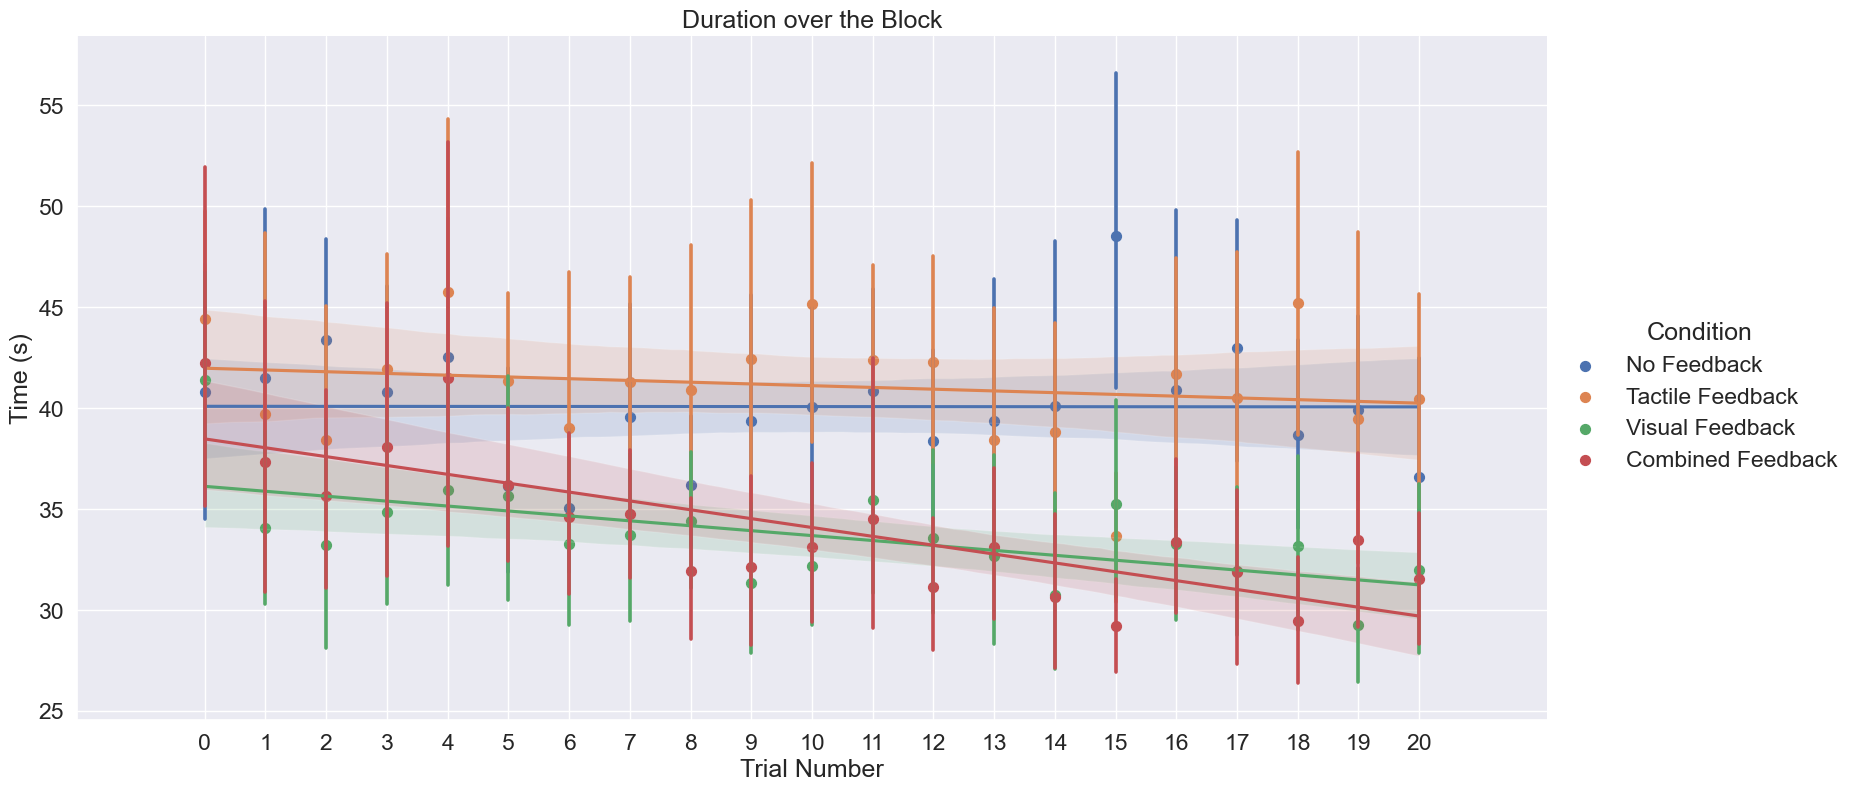

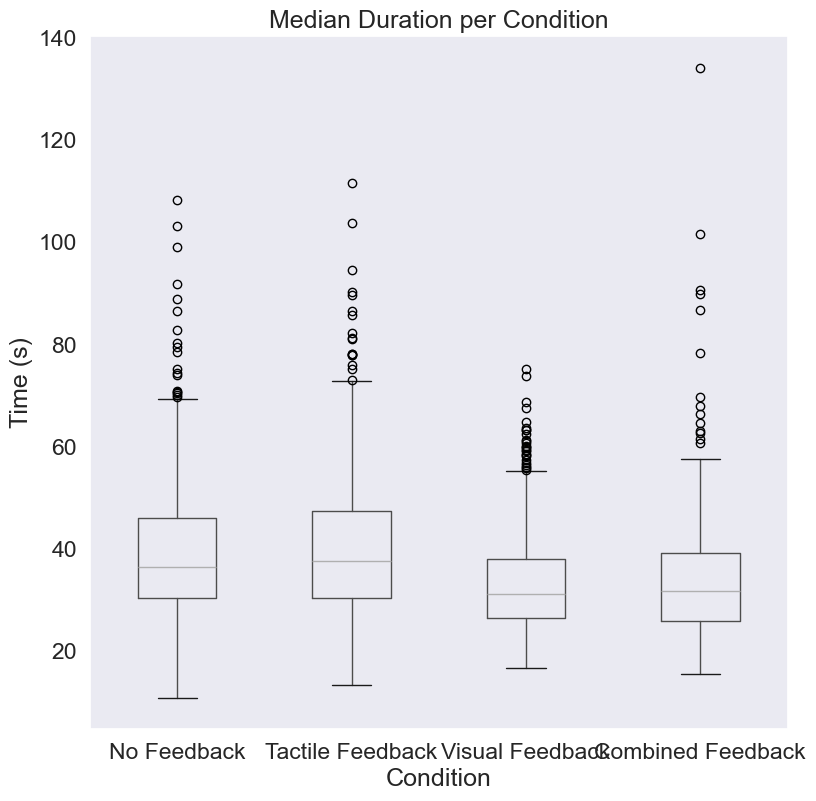

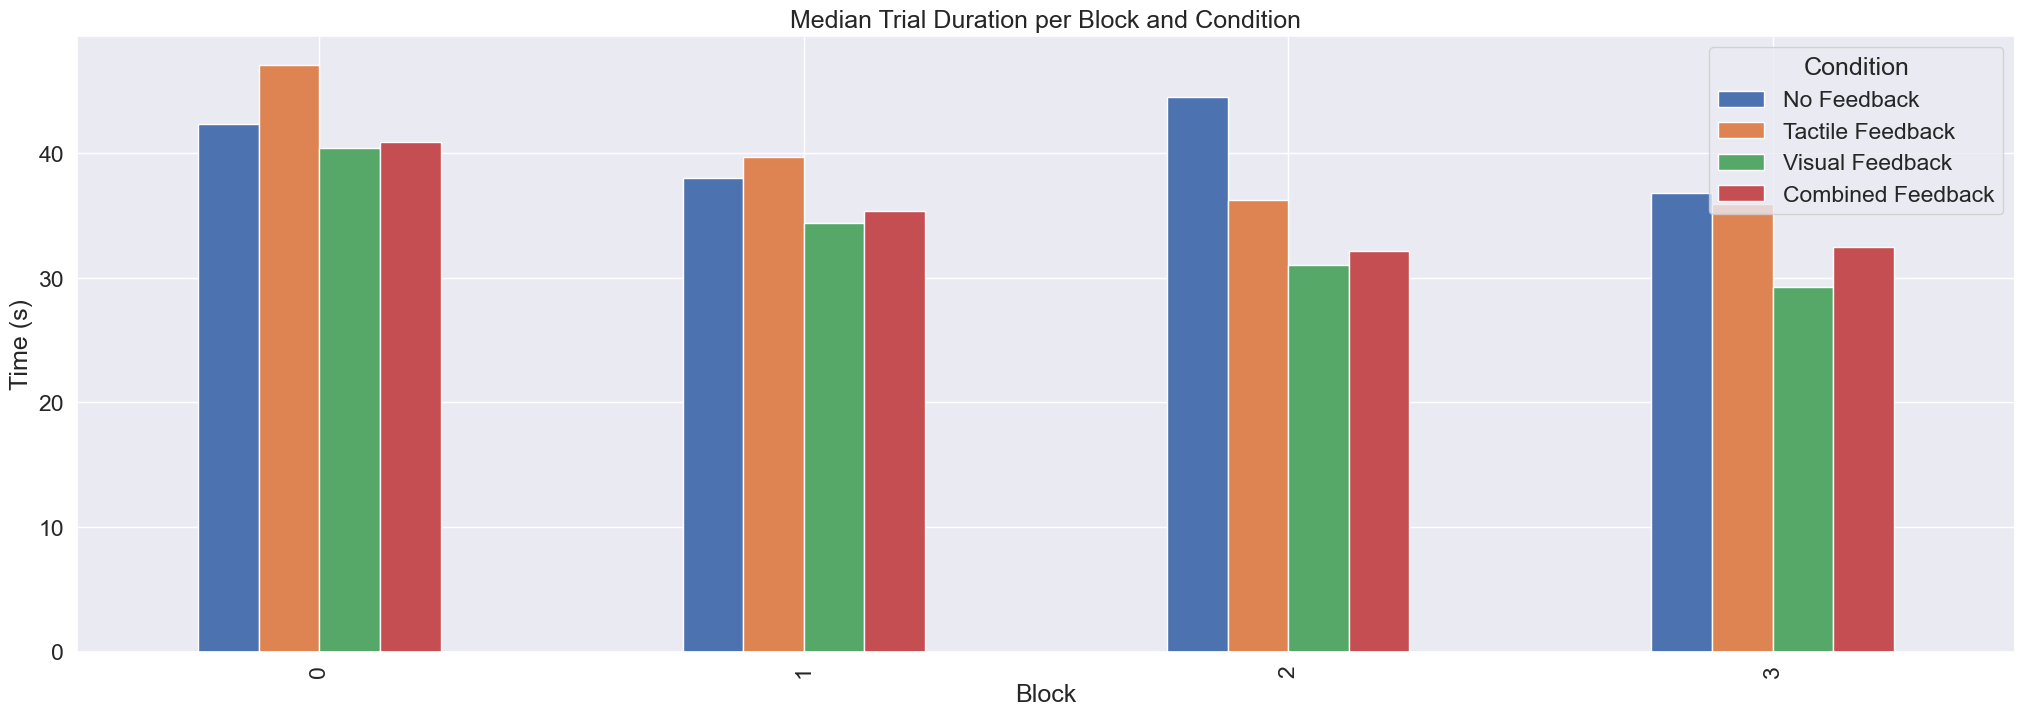

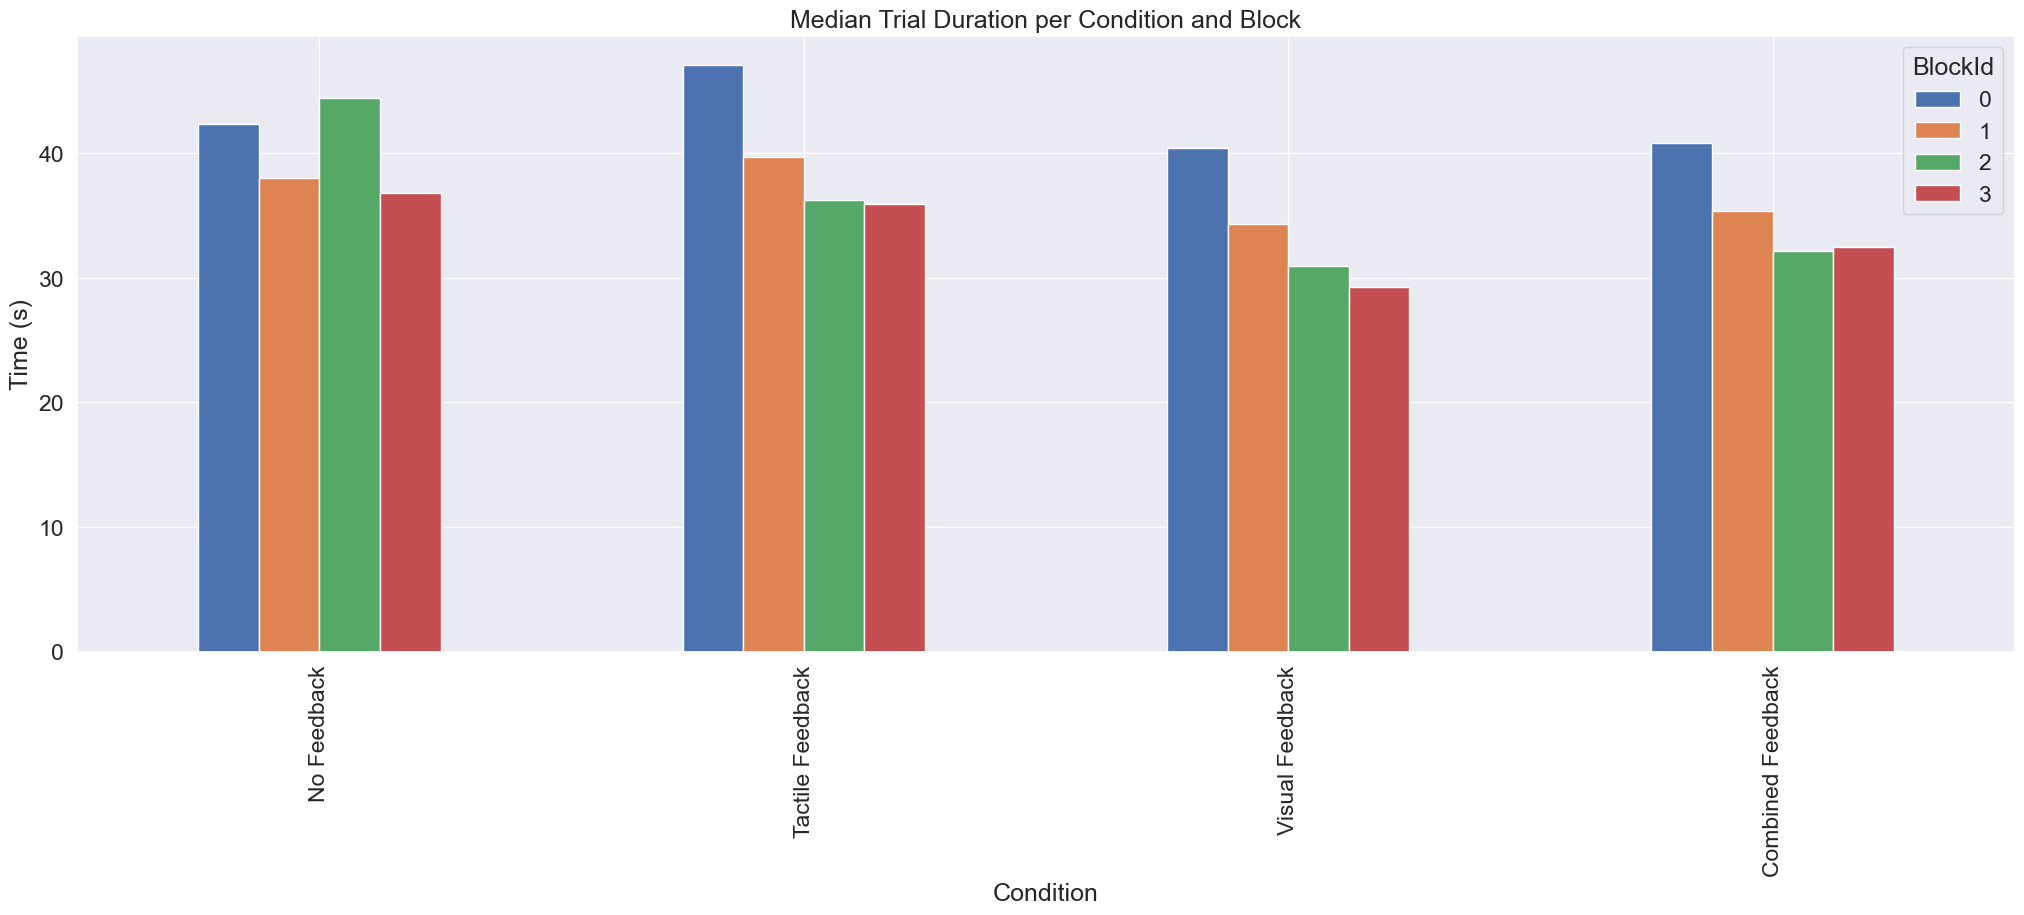

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
countCondition,,,,
2,73.023,29.450,45.543,38.167
3,34.747,23.837,22.486,27.086
4,54.514,23.652,20.038,38.611
5,52.633,26.468,33.918,23.725
6,50.048,39.508,22.826,24.492
...,...,...,...,...
501,34.686,37.409,37.350,33.030
502,29.188,28.439,27.690,13.704
503,54.727,24.540,42.894,15.558


BlockId,0,1,2,3
Condition,,,,
No Feedback,39.810167,35.627464,40.674940,33.515170
Tactile Feedback,43.136088,37.030964,32.946452,33.224369
Visual Feedback,36.822048,30.204381,28.242367,27.258321
Combined Feedback,37.521032,32.095476,29.459488,29.535611


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,441.000000,441.000000,441.000000,441.000000
mean,37.079848,37.951939,30.564857,31.134980
std,13.936576,14.342623,9.940149,11.904432
min,9.477000,10.088000,16.198000,13.588000
5%,21.537000,21.367000,18.743000,18.789000
10%,23.223000,23.361000,20.176000,20.351000
25%,27.545000,27.425000,23.860000,23.096000
50%,33.432000,34.578000,28.025000,28.679000
75%,43.718000,44.268000,35.167000,36.094000
90%,55.455000,57.400000,45.458000,44.742000


,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback,DurationMS_Cleaned
count,441.000000,441.000000,441.000000,441.000000,1764.000000
mean,37.079848,37.951939,30.564857,31.134980,34.182906
std,13.936576,14.342623,9.940149,11.904432,13.080279
min,9.477000,10.088000,16.198000,13.588000,9.477000
5%,21.537000,21.367000,18.743000,18.789000,NaN
10%,23.223000,23.361000,20.176000,20.351000,NaN
25%,27.545000,27.425000,23.860000,23.096000,25.145500
50%,33.432000,34.578000,28.025000,28.679000,30.805500
75%,43.718000,44.268000,35.167000,36.094000,40.033750
90%,55.455000,57.400000,45.458000,44.742000,NaN


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
TrialId,,,,
0,37.286429,40.510143,36.873619,38.336571
1,36.725190,36.718000,31.579143,34.652762
2,40.262952,35.339048,30.521333,32.993095
3,37.536095,38.789857,31.993238,34.841762
4,39.887048,41.863333,32.701381,38.108048
5,33.355952,38.410619,32.859619,33.238857
6,32.296429,36.016571,30.370143,31.465762
7,36.739381,38.352048,30.763238,31.848095
8,33.426000,37.553714,31.601095,29.025333


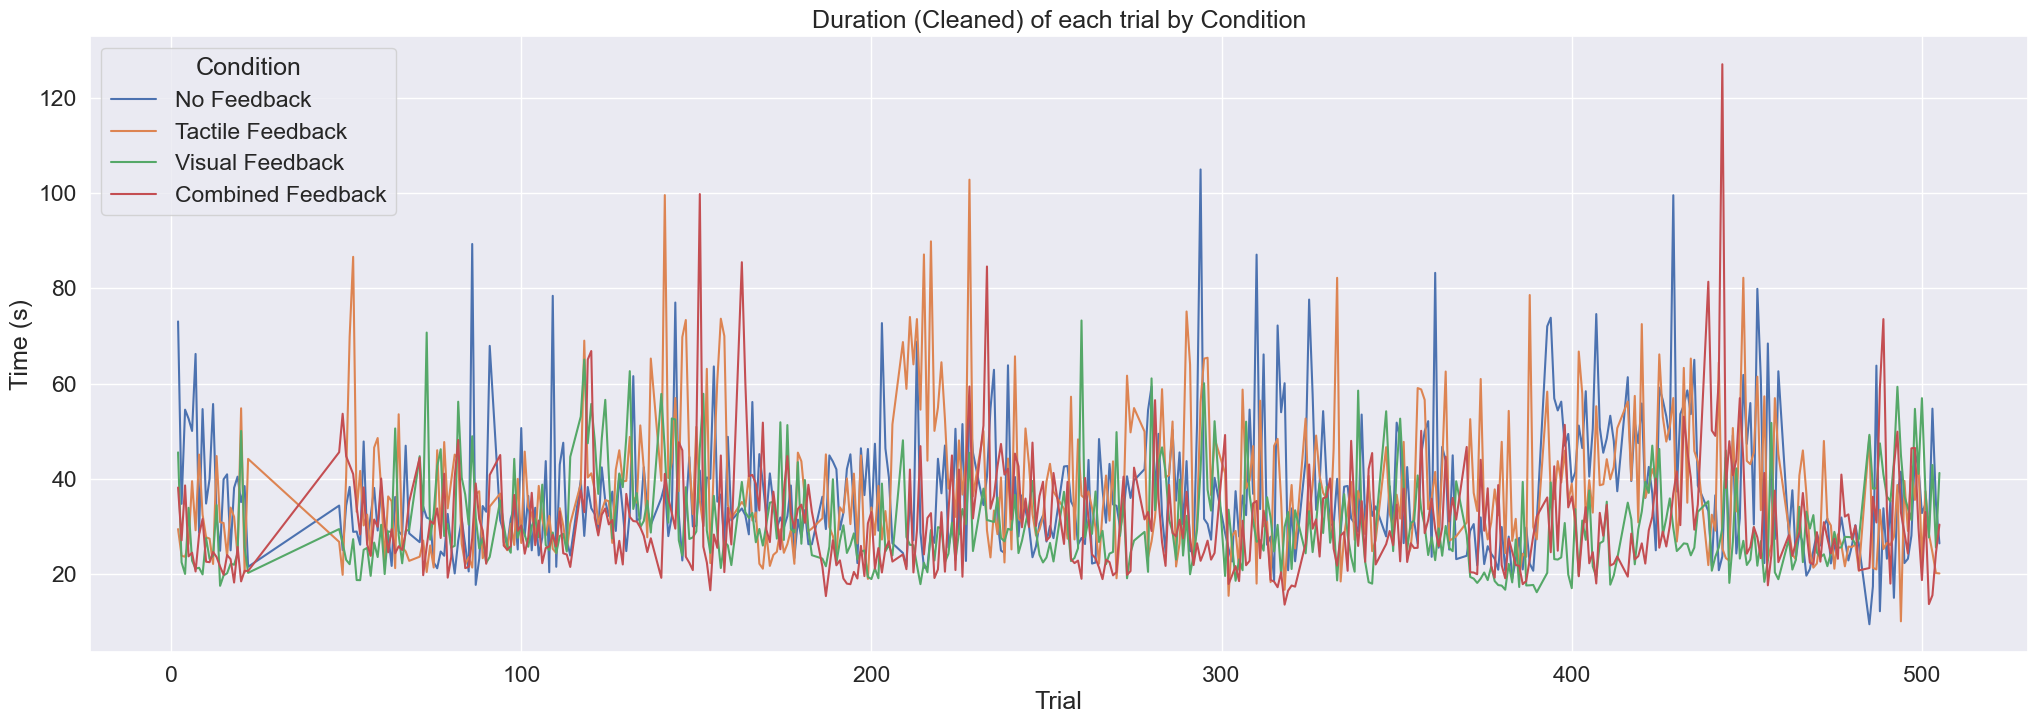

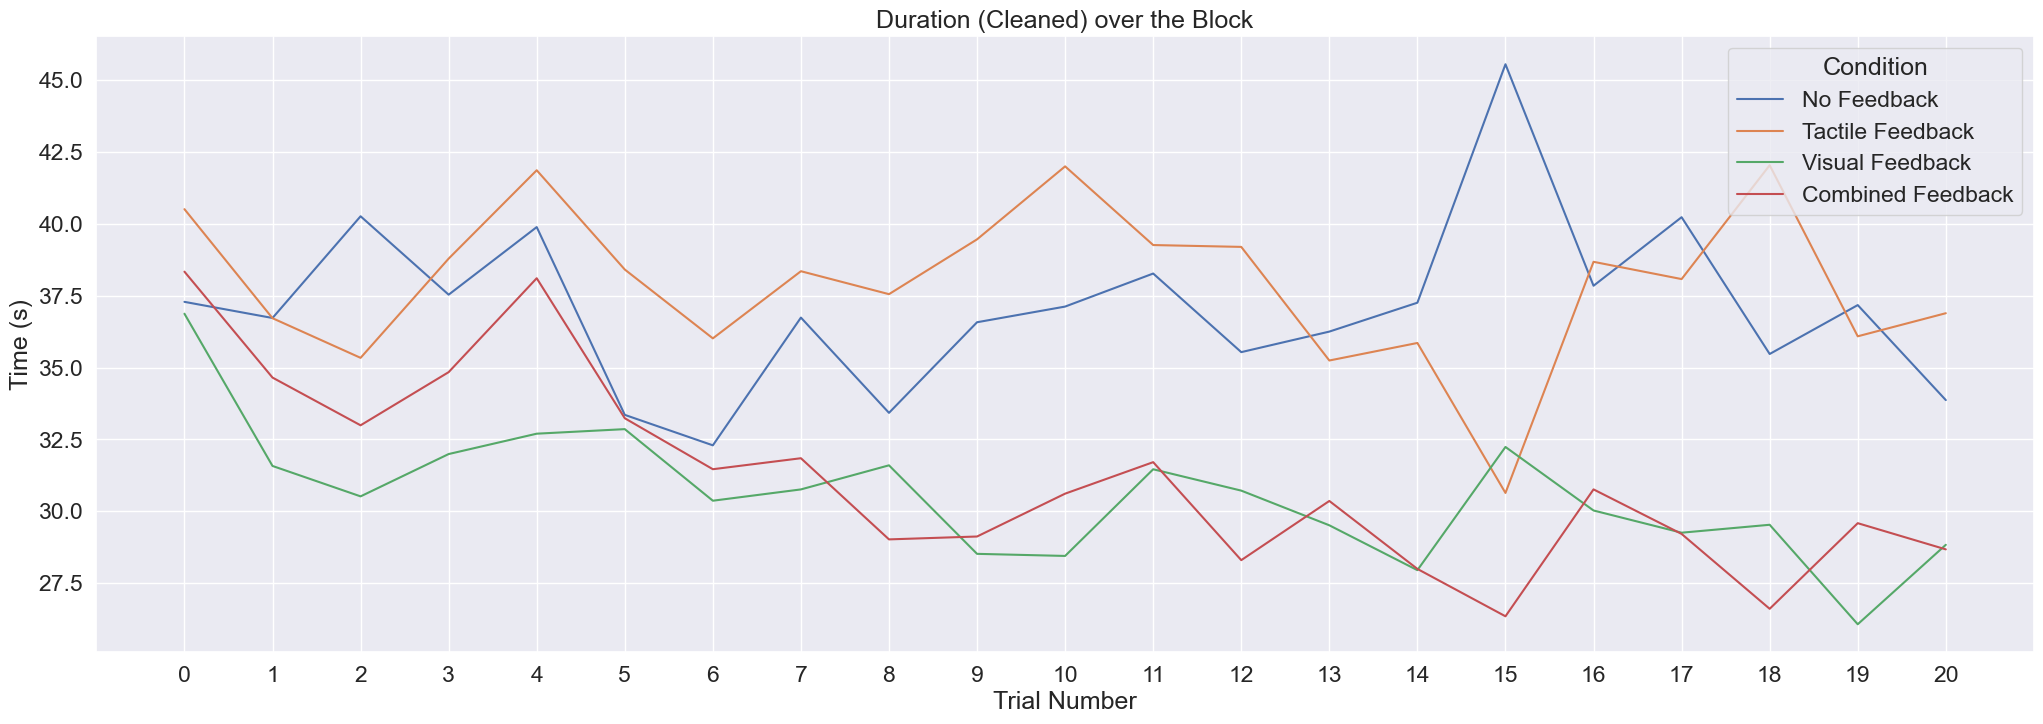

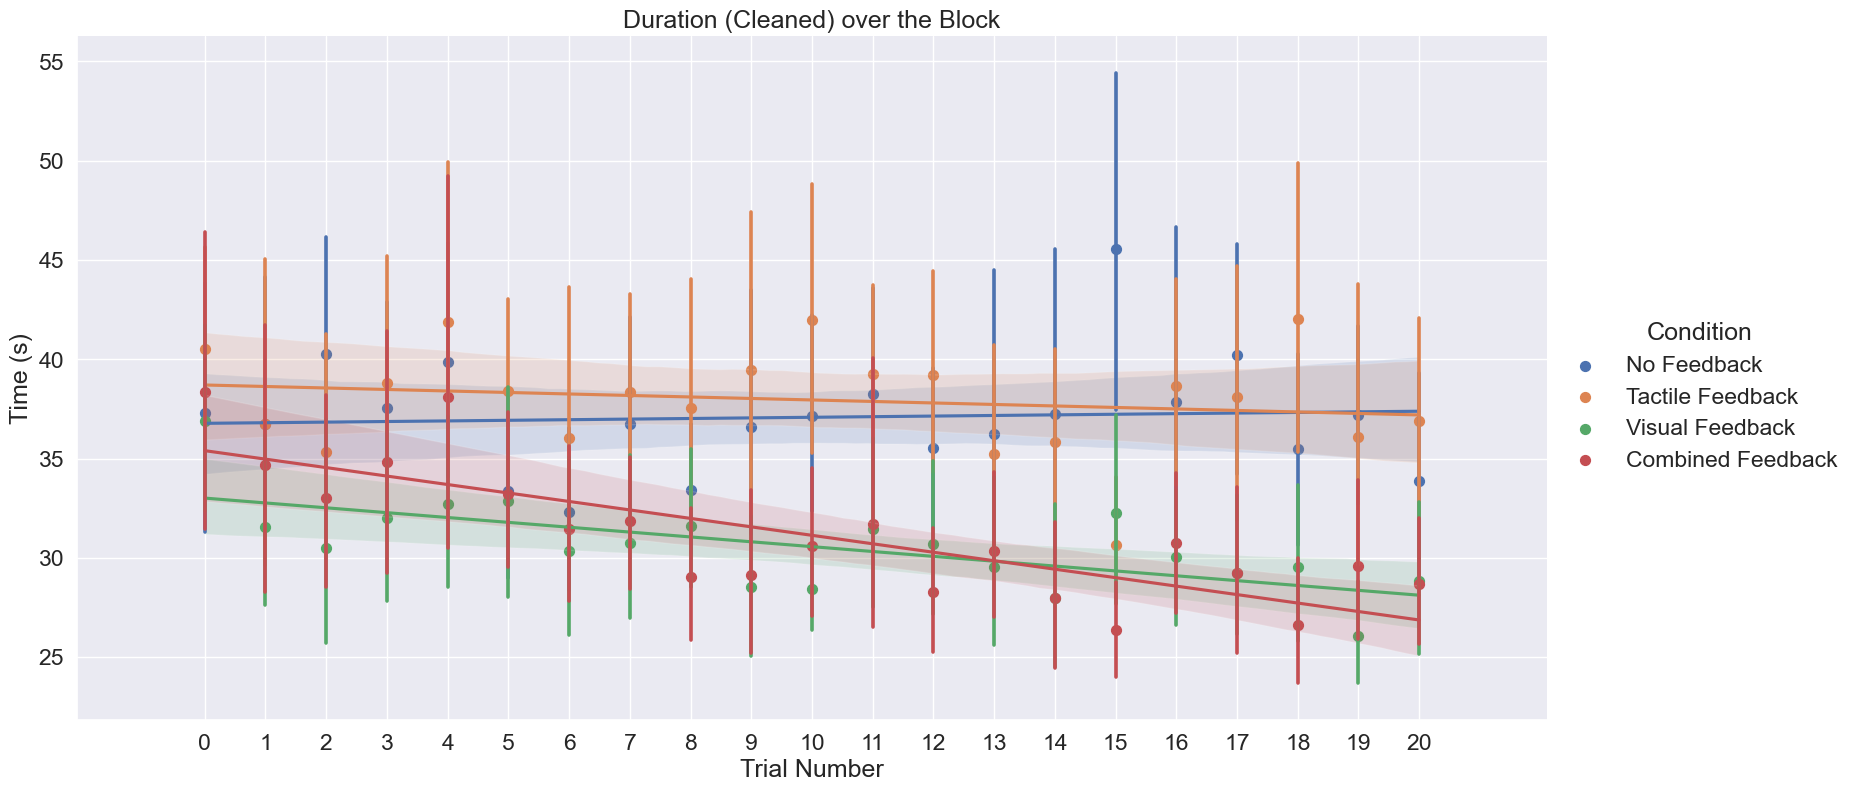

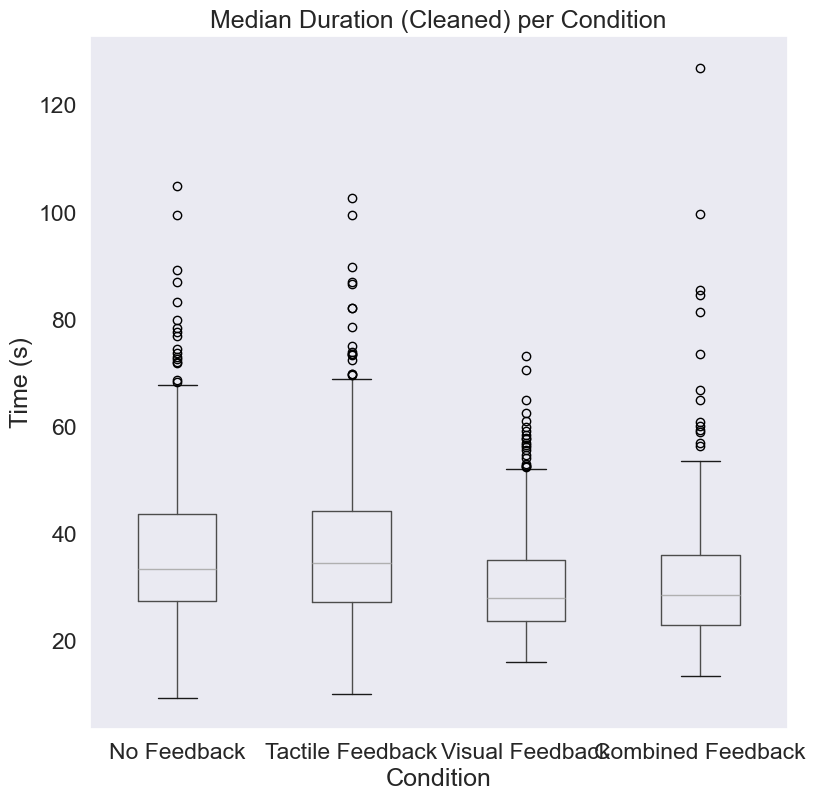

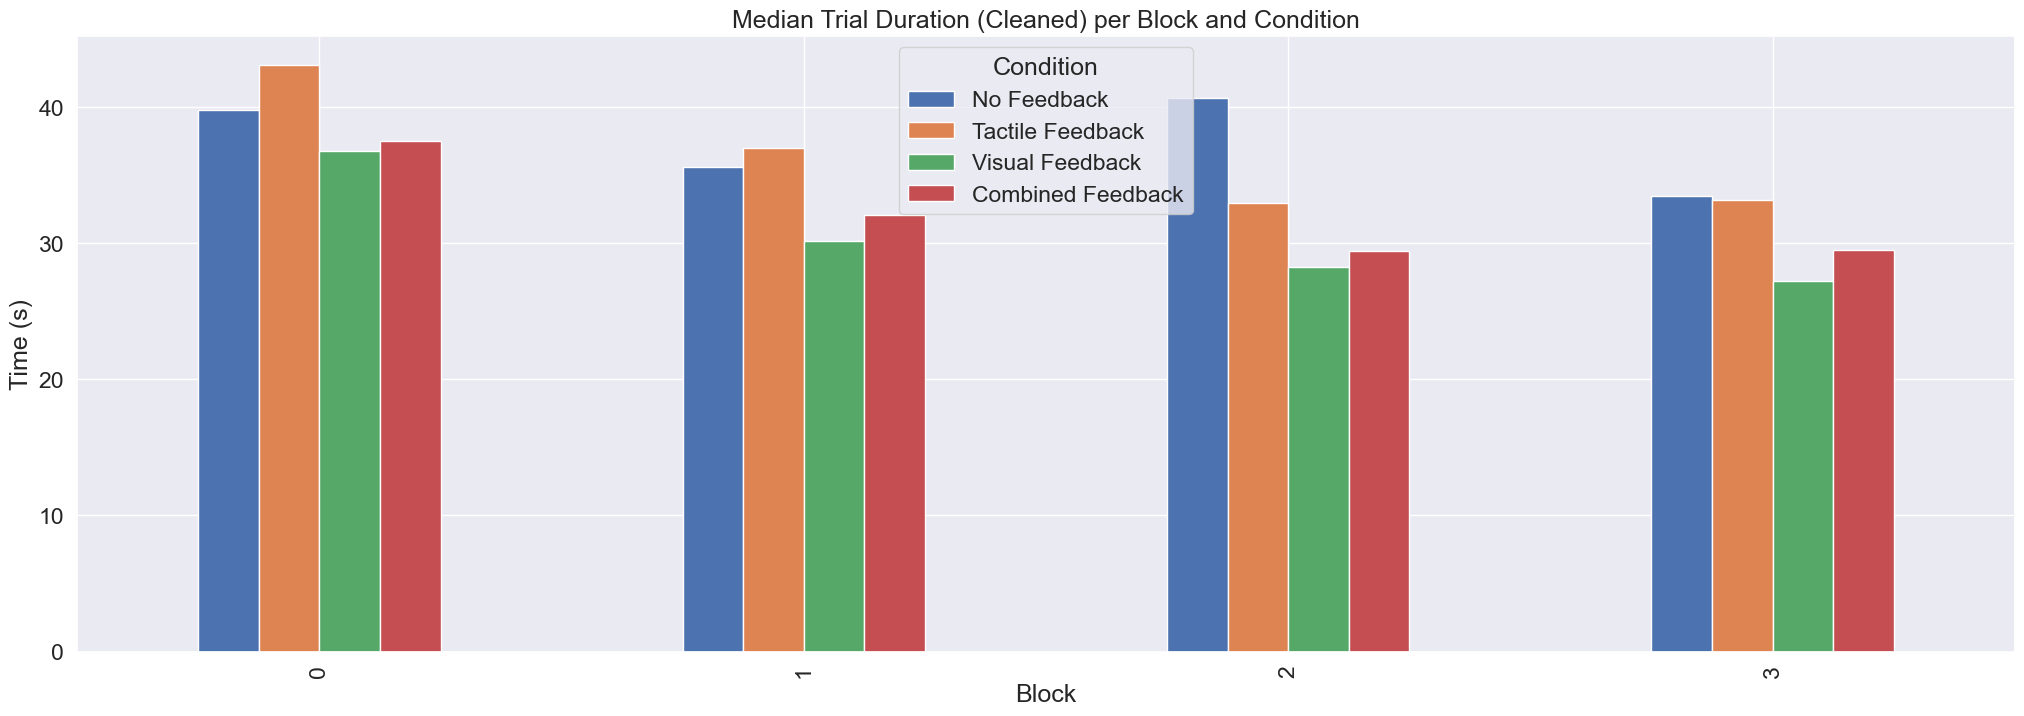

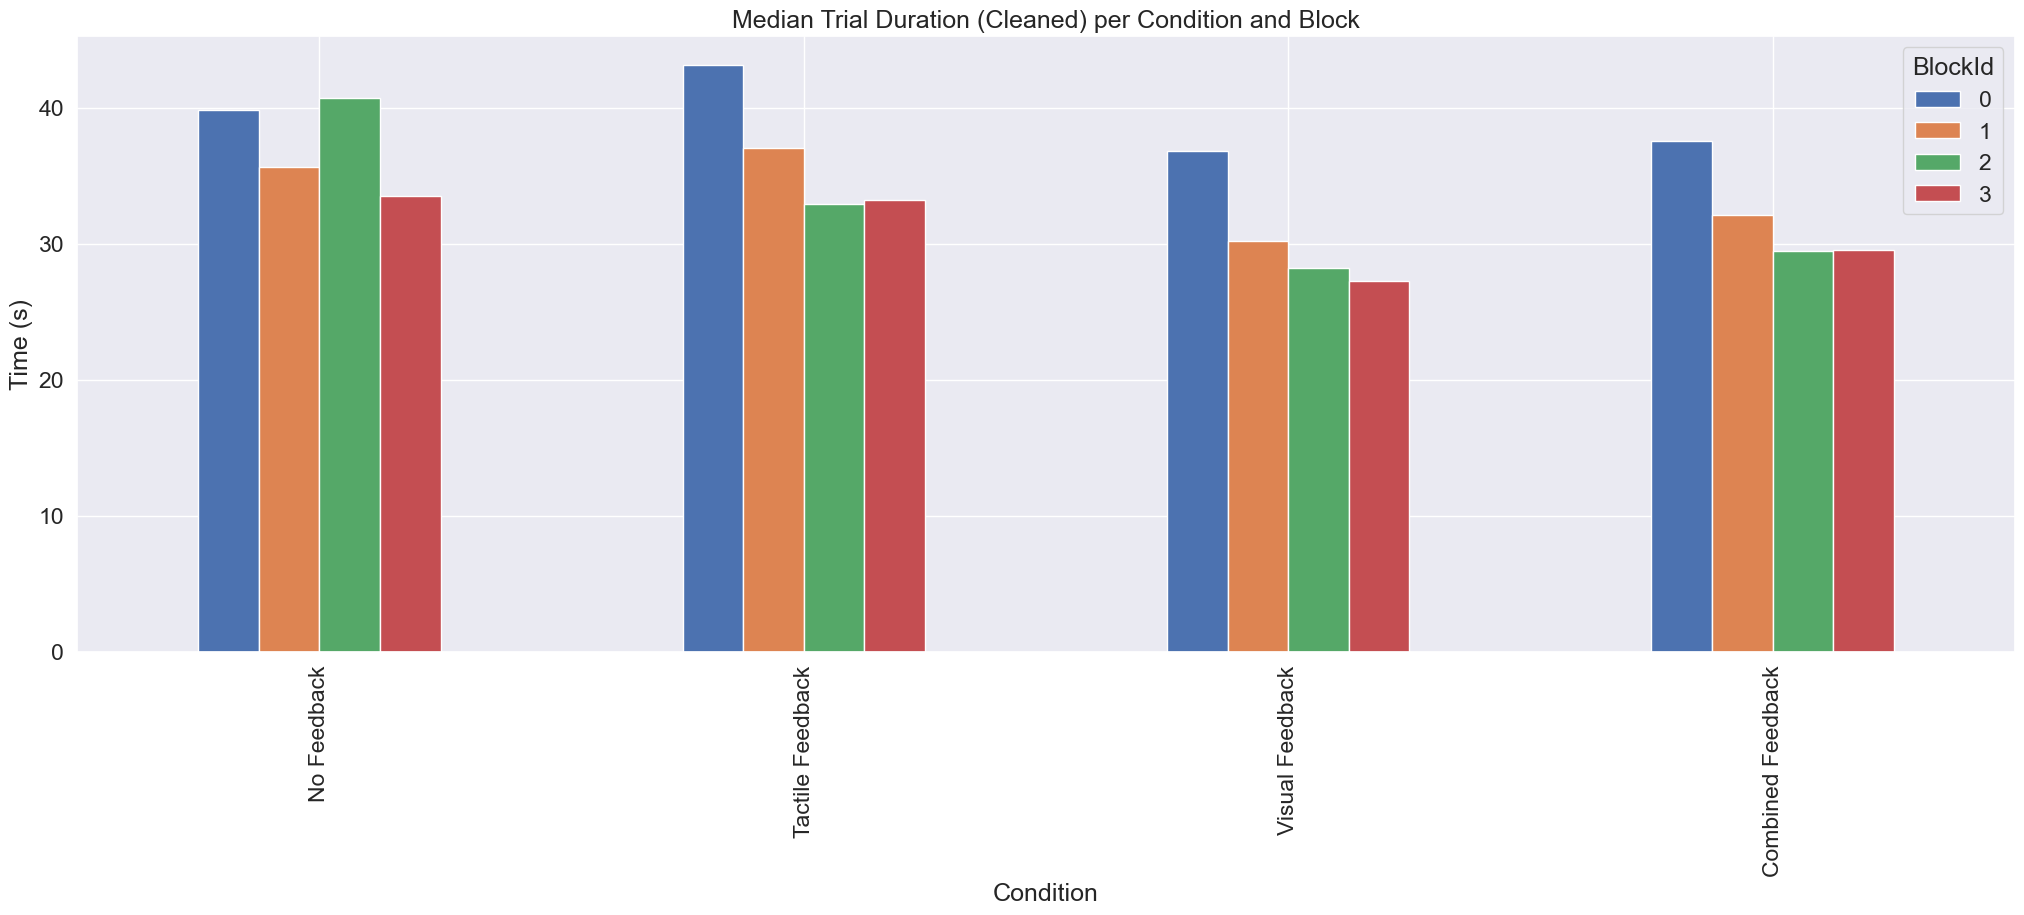

In [3]:
# sns.set(font_scale = 2)

computeStatistics(data_complete, 'DurationMS', 'duration', 'Duration')

computeStatistics(data_complete, 'DurationMS_Cleaned', 'duration_cleaned', 'Duration (Cleaned)')


---
# Results

* compute result (true/false) and offset (+/- x layers, number) for result layer and number
* group trial result by condition and trial index (in Block)
* compute descriptive statistics
* plots
* export for spss
---

,Condition,Incorrect Number,Correct Number,Total,Success Rate Numbers
0,No Feedback,23,418,441,0.947846
1,Tactile Feedback,32,409,441,0.927438
2,Visual Feedback,15,426,441,0.965986
3,Combined Feedback,10,431,441,0.977324


,Condition,Incorrect Layer,Correct Layer,Total,Success Rate Layers
0,No Feedback,30,411,441,0.931973
1,Tactile Feedback,50,391,441,0.886621
2,Visual Feedback,16,425,441,0.963719
3,Combined Feedback,18,423,441,0.959184


,Condition,Incorrect Number,Correct Number,Success Rate Numbers,Incorrect Layer,Correct Layer,Success Rate Layers,Total
0,No Feedback,23,418,0.947846,30,411,0.931973,441
1,Tactile Feedback,32,409,0.927438,50,391,0.886621,441
2,Visual Feedback,15,426,0.965986,16,425,0.963719,441
3,Combined Feedback,10,431,0.977324,18,423,0.959184,441


,Condition,Incorrect Number,Incorrect Layer
0,No Feedback,23,30
1,Tactile Feedback,32,50
2,Visual Feedback,15,16
3,Combined Feedback,10,18


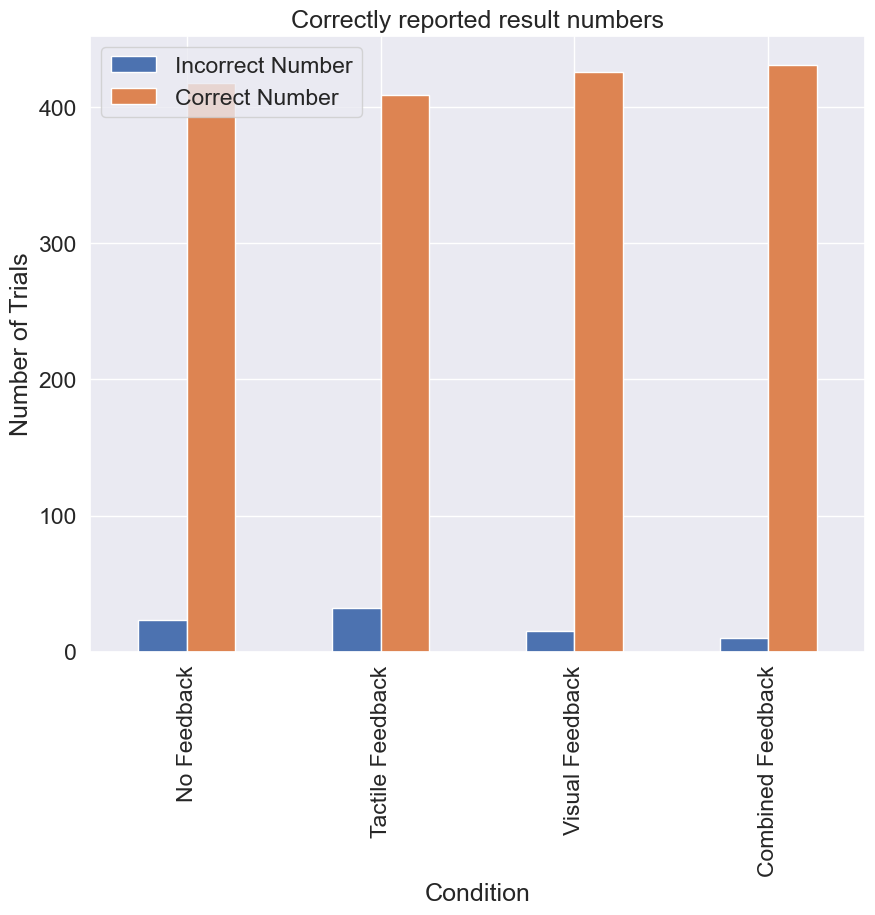

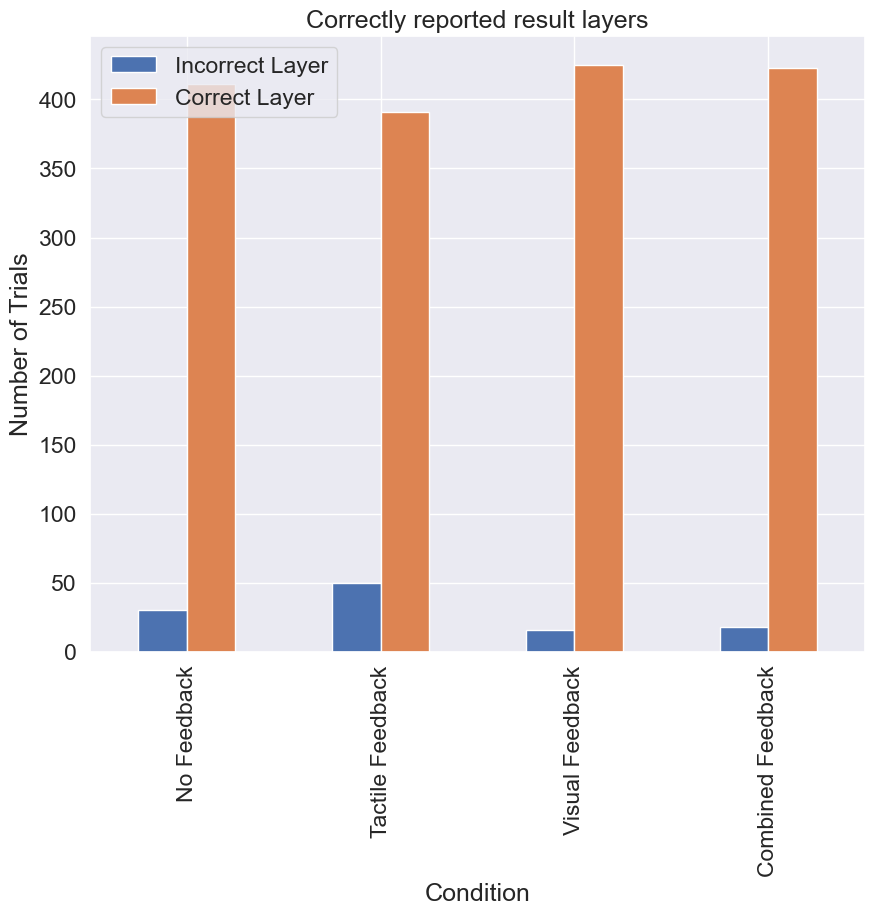

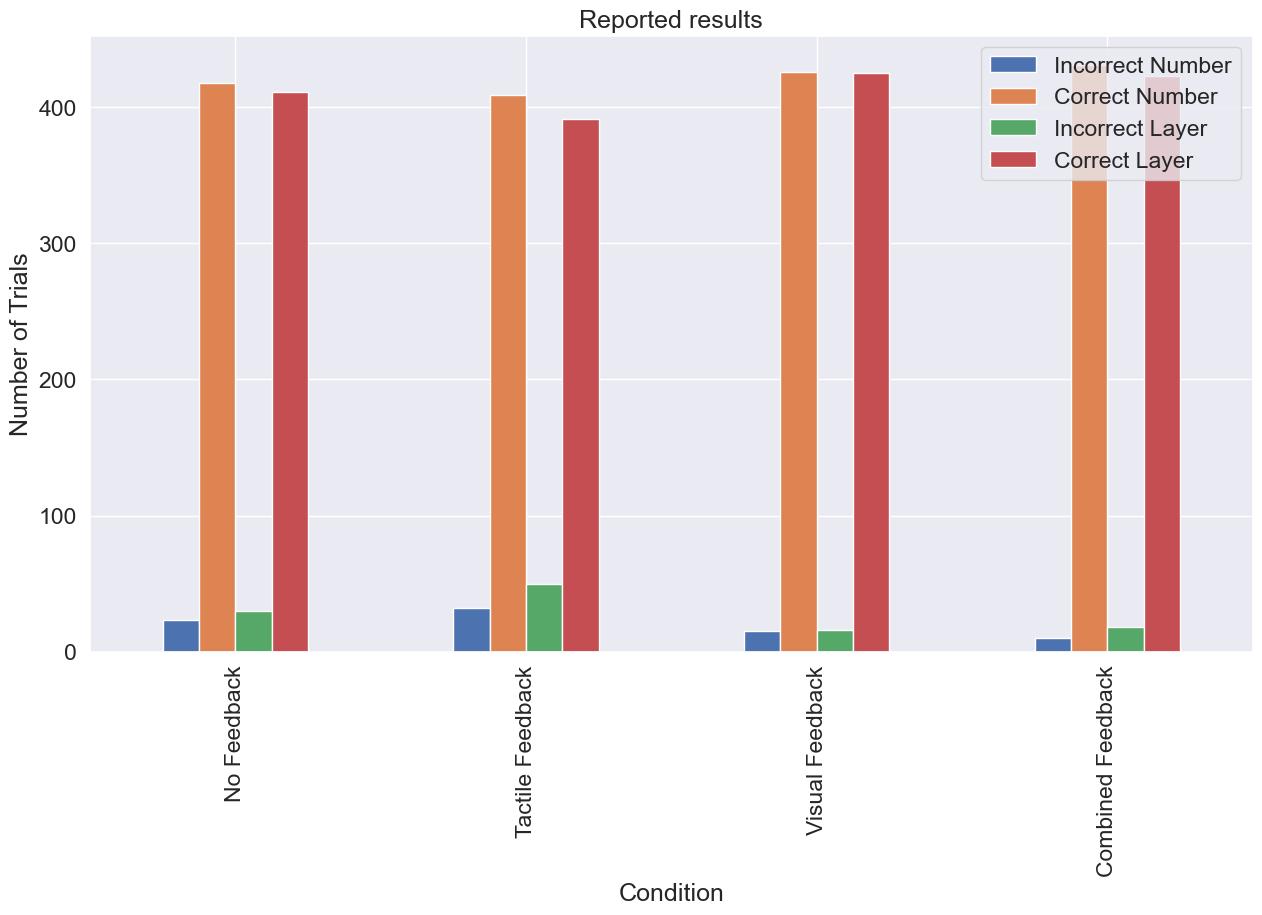

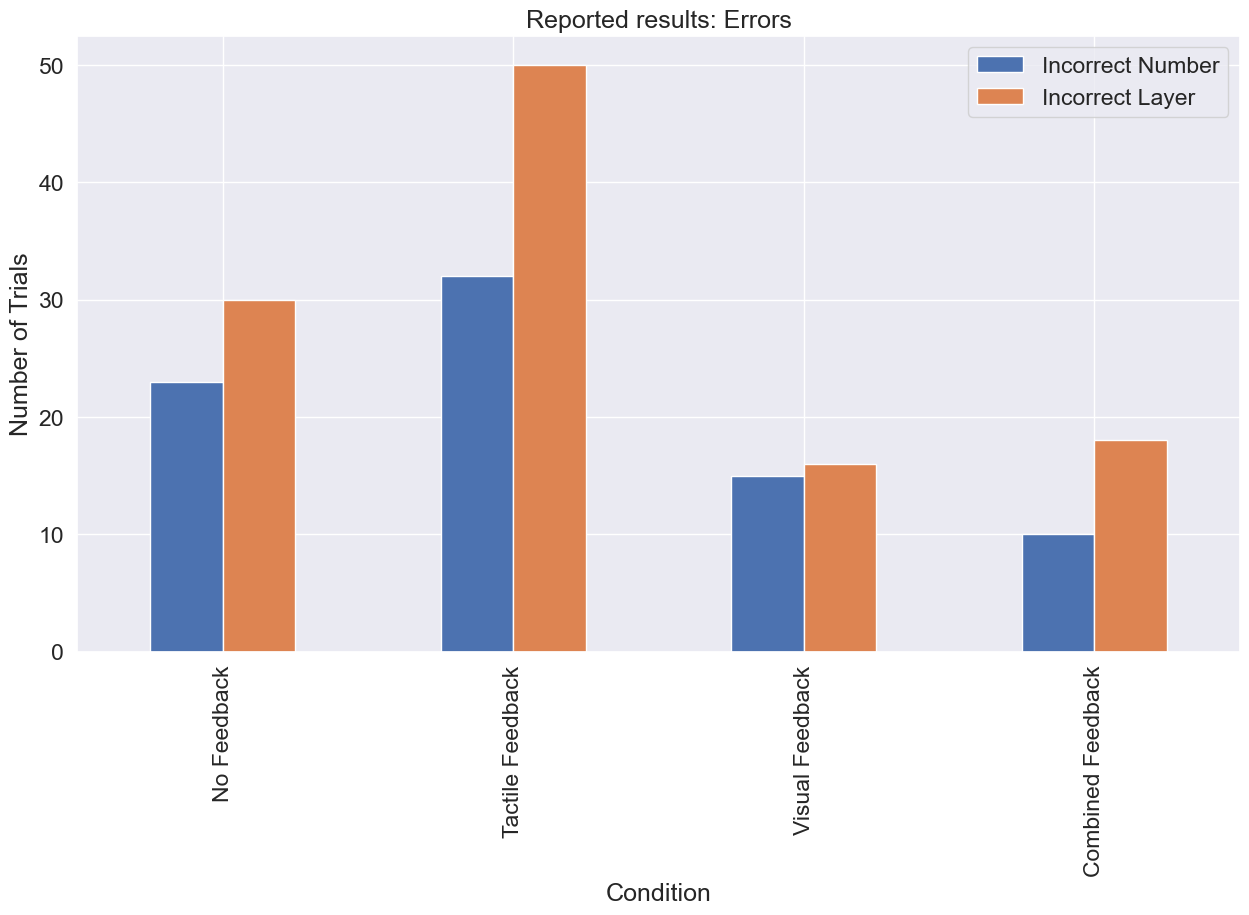

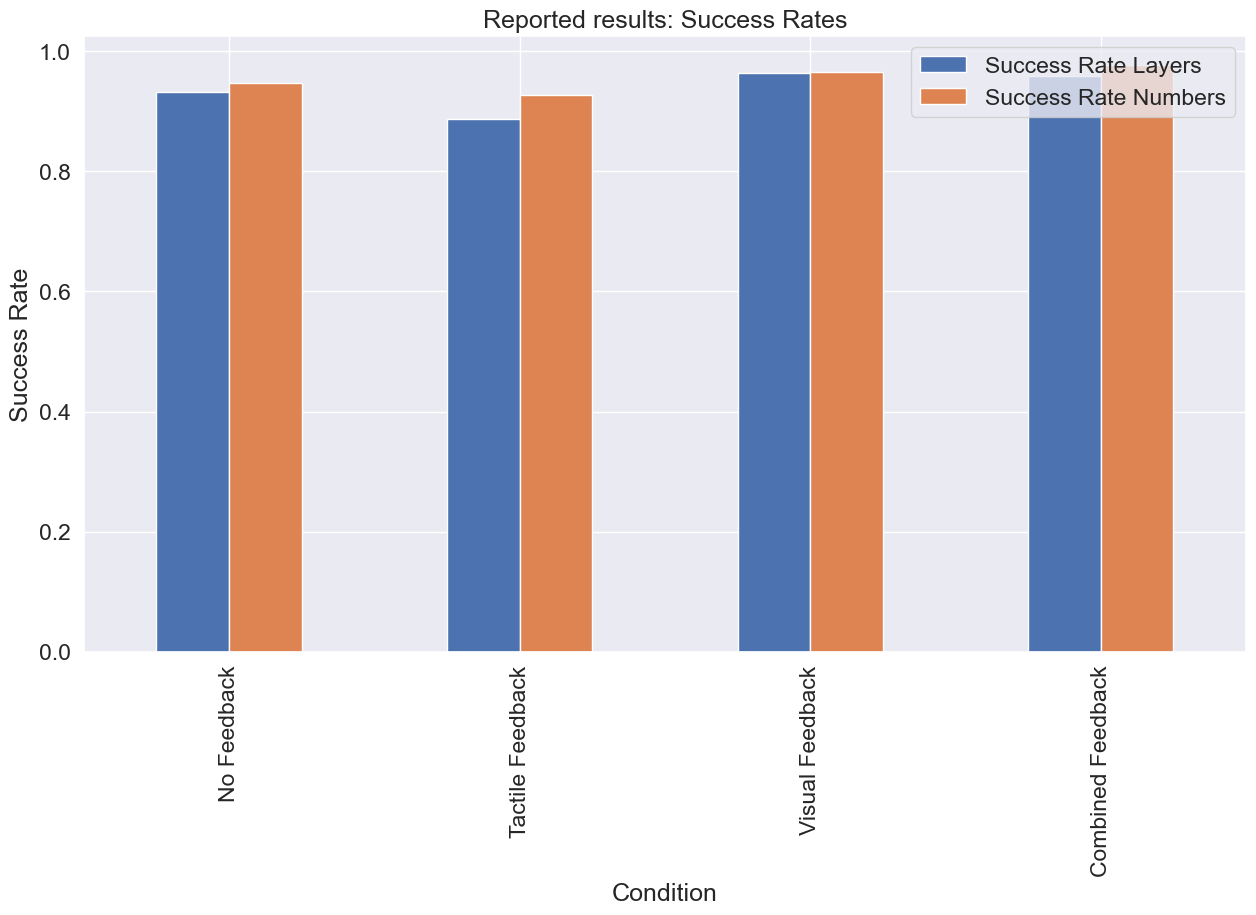

In [4]:
results_by_condition = data_complete.groupby(["Condition", "ResultNumberCorrect"]).count().unstack(level=0).fillna(0)['BlockId'].reindex(columns=condition_names).stack().unstack(level=0).reset_index()

results_by_condition.columns = ['Condition', 'Incorrect Number', 'Correct Number']

results_by_condition['Total'] = results_by_condition['Incorrect Number'] + results_by_condition['Correct Number']
results_by_condition['Success Rate Numbers'] = results_by_condition['Correct Number'] / results_by_condition['Total']

display(results_by_condition)

# results_by_condition = results_by_condition.drop(['Total','Success Rate'], axis=1)

fig5, ax5 = plt.subplots(figsize=(10,8))
results_by_condition[['Condition', 'Incorrect Number', 'Correct Number']].plot(x = "Condition", ax=ax5, kind="bar")

ax5.set_ylabel('Number of Trials')

plt.title('Correctly reported result numbers')

fig5.savefig(rf'{export_img}result_numberCondition.png')
fig5.savefig(rf'{export_img}result_numberCondition.svg')

results_by_condition2 = data_complete.groupby(["Condition", "ResultLayerCorrect"]).count().unstack(level=0).fillna(0)['BlockId'].reindex(columns=condition_names).stack().unstack(level=0).reset_index()

results_by_condition2.columns = ['Condition', 'Incorrect Layer', 'Correct Layer']

results_by_condition2['Total'] = results_by_condition2['Incorrect Layer'] + results_by_condition2['Correct Layer']
results_by_condition2['Success Rate Layers'] = results_by_condition2['Correct Layer'] / results_by_condition2['Total']

display(results_by_condition2)

# results_by_condition2 = results_by_condition2.drop(['Total','Success Rate'], axis=1)

fig6, ax6 = plt.subplots(figsize=(10,8))
results_by_condition2[['Condition', 'Incorrect Layer', 'Correct Layer']].plot(x = "Condition", ax=ax6, kind="bar")

ax6.set_ylabel('Number of Trials')

plt.title('Correctly reported result layers')

fig6.savefig(rf'{export_img}result_layerCondition.png')
fig6.savefig(rf'{export_img}result_layerCondition.svg')

results_by_condition3 = pd.merge(results_by_condition, results_by_condition2.drop(['Total'], axis=1), how='left', on='Condition')
total = results_by_condition3.pop('Total')
results_by_condition3.insert(7, total.name, total)

display(results_by_condition3)

fig7, ax7 = plt.subplots(figsize=(15,8))
results_by_condition3[['Condition', 'Incorrect Number', 'Correct Number', 'Incorrect Layer', 'Correct Layer']].plot(x = "Condition", ax=ax7, kind="bar")

ax7.set_ylabel('Number of Trials')

plt.title('Reported results')

fig7.savefig(rf'{export_img}result_combinedCondition.png')
fig7.savefig(rf'{export_img}result_combinedCondition.svg')

results_by_condition4 = results_by_condition3.drop(['Correct Number', 'Correct Layer', 'Total', 'Success Rate Layers', 'Success Rate Numbers'], axis=1)

display(results_by_condition4)

fig8, ax8 = plt.subplots(figsize=(15,8))
results_by_condition4.plot(x = "Condition", ax=ax8, kind="bar")

ax8.set_ylabel('Number of Trials')

plt.title('Reported results: Errors')

fig8.savefig(rf'{export_img}result_combinedCondition_errors.png')
fig8.savefig(rf'{export_img}result_combinedCondition_errors.svg')

fig9, ax9 = plt.subplots(figsize=(15,8))
results_by_condition3[['Condition', 'Success Rate Layers', 'Success Rate Numbers']].plot(x = "Condition", ax=ax9, kind="bar")

ax9.set_ylabel('Success Rate')

plt.title('Reported results: Success Rates')

fig9.savefig(rf'{export_img}result_combinedCondition_successRate.png')
fig9.savefig(rf'{export_img}result_combinedCondition_successRate.svg')


In [5]:
results_number = data_complete.groupby(["ProbandId", "ResultNumberCorrect"]).count().unstack(level=0).fillna(0)['BlockId'].stack().unstack(level=0).reset_index()

results_number["success_rate"] = results_number[True] / (results_number[False] + results_number[True]) 

display(results_number)
display(results_number['success_rate'].describe())

results_layer = data_complete.groupby(["ProbandId", "ResultLayerCorrect"]).count().unstack(level=0).fillna(0)['BlockId'].stack().unstack(level=0).reset_index()

results_layer["success_rate"] = results_layer[True] / (results_layer[False] + results_layer[True]) 

display(results_layer)
display(results_layer['success_rate'].describe())

results_condition_number = data_complete.groupby(["ProbandId", "Condition", "ResultNumberCorrect"]).count().unstack(level=0).fillna(0)['BlockId'].stack().unstack(level=0).unstack(level=0).stack().reset_index()
results_condition_number = results_condition_number[results_condition_number['ResultNumberCorrect'] != False]
results_condition_number["success_rate_NoFeedback"] = results_condition_number["No Feedback"] / 21
results_condition_number["success_rate_VisualFeedback"] = results_condition_number["Visual Feedback"] / 21
results_condition_number["success_rate_TactileFeedback"] = results_condition_number["Tactile Feedback"] / 21
results_condition_number["success_rate_CombinedFeedback"] = results_condition_number["Combined Feedback"] / 21

display(results_condition_number)
display(results_condition_number[['success_rate_NoFeedback', 'success_rate_VisualFeedback', 'success_rate_TactileFeedback', 'success_rate_CombinedFeedback']].describe())


ResultNumberCorrect,ProbandId,False,True,success_rate
0,2,3.0,81.0,0.964286
1,4,1.0,83.0,0.988095
2,5,11.0,73.0,0.869048
3,6,7.0,77.0,0.916667
4,7,1.0,83.0,0.988095
5,8,2.0,82.0,0.976190
6,9,0.0,84.0,1.000000
7,10,1.0,83.0,0.988095
8,11,3.0,81.0,0.964286
9,12,0.0,84.0,1.000000


count    21.000000
mean      0.954649
std       0.045740
min       0.857143
25%       0.952381
50%       0.964286
75%       0.988095
max       1.000000
Name: success_rate, dtype: float64

ResultLayerCorrect,ProbandId,False,True,success_rate
0,2,7.0,77.0,0.916667
1,4,0.0,84.0,1.000000
2,5,10.0,74.0,0.880952
3,6,5.0,79.0,0.940476
4,7,0.0,84.0,1.000000
5,8,2.0,82.0,0.976190
6,9,2.0,82.0,0.976190
7,10,3.0,81.0,0.964286
8,11,4.0,80.0,0.952381
9,12,0.0,84.0,1.000000


count    21.000000
mean      0.935374
std       0.064172
min       0.773810
25%       0.892857
50%       0.952381
75%       0.988095
max       1.000000
Name: success_rate, dtype: float64

Condition,ProbandId,ResultNumberCorrect,Combined Feedback,No Feedback,Tactile Feedback,Visual Feedback,success_rate_NoFeedback,success_rate_VisualFeedback,success_rate_TactileFeedback,success_rate_CombinedFeedback
1,2,True,20.0,21.0,20.0,20.0,1.000000,0.952381,0.952381,0.952381
3,4,True,21.0,21.0,20.0,21.0,1.000000,1.000000,0.952381,1.000000
5,5,True,19.0,18.0,18.0,18.0,0.857143,0.857143,0.857143,0.904762
7,6,True,20.0,20.0,17.0,20.0,0.952381,0.952381,0.809524,0.952381
9,7,True,21.0,21.0,21.0,20.0,1.000000,0.952381,1.000000,1.000000
11,8,True,20.0,21.0,21.0,20.0,1.000000,0.952381,1.000000,0.952381
13,9,True,21.0,21.0,21.0,21.0,1.000000,1.000000,1.000000,1.000000
15,10,True,21.0,20.0,21.0,21.0,0.952381,1.000000,1.000000,1.000000
17,11,True,21.0,20.0,19.0,21.0,0.952381,1.000000,0.904762,1.000000
19,12,True,21.0,21.0,21.0,21.0,1.000000,1.000000,1.000000,1.000000


Condition,success_rate_NoFeedback,success_rate_VisualFeedback,success_rate_TactileFeedback,success_rate_CombinedFeedback
count,21.000000,21.000000,21.000000,21.000000
mean,0.947846,0.965986,0.927438,0.977324
std,0.060054,0.052474,0.089871,0.035695
min,0.809524,0.809524,0.714286,0.904762
25%,0.904762,0.952381,0.904762,0.952381
50%,0.952381,1.000000,0.952381,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Results: layer differences

,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Combined Feedback,441.0,0.018141,0.441729,-2.0,0.0,0.0,0.0,6.0
No Feedback,441.0,0.009070,0.663948,-4.0,0.0,0.0,0.0,5.0
Tactile Feedback,441.0,0.108844,0.856493,-6.0,0.0,0.0,0.0,6.0
Visual Feedback,441.0,-0.034014,0.438203,-6.0,0.0,0.0,0.0,3.0


,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Combined Feedback,441.0,0.068027,0.436825,0.0,0.0,0.0,0.0,6.0
No Feedback,441.0,0.145125,0.647920,0.0,0.0,0.0,0.0,5.0
Tactile Feedback,441.0,0.231293,0.831767,0.0,0.0,0.0,0.0,6.0
Visual Feedback,441.0,0.065760,0.434566,0.0,0.0,0.0,0.0,6.0


,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Combined Feedback,441.0,0.009718,0.062404,0.0,0.0,0.0,0.0,0.857143
No Feedback,441.0,0.020732,0.092560,0.0,0.0,0.0,0.0,0.714286
Tactile Feedback,441.0,0.033042,0.118824,0.0,0.0,0.0,0.0,0.857143
Visual Feedback,441.0,0.009394,0.062081,0.0,0.0,0.0,0.0,0.857143


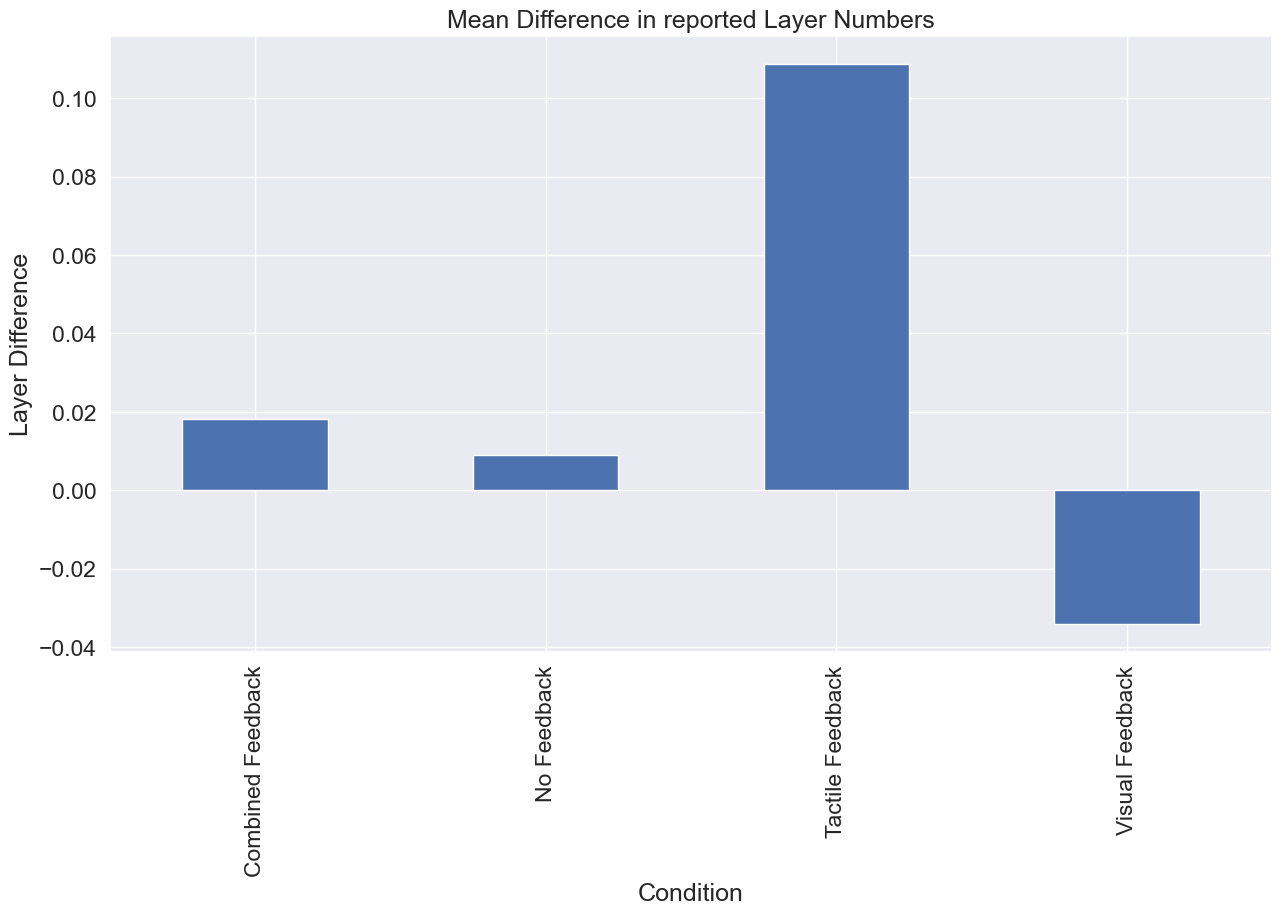

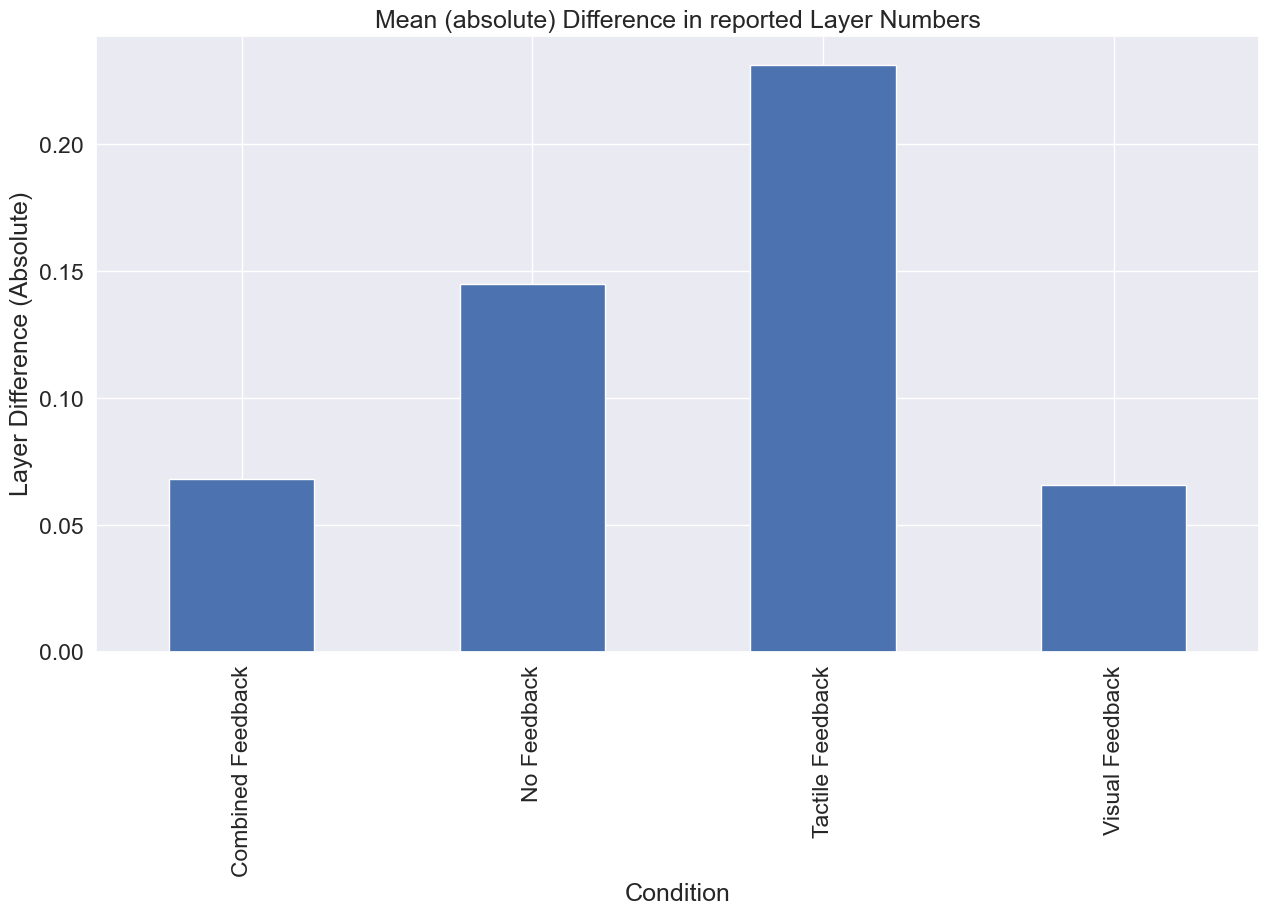

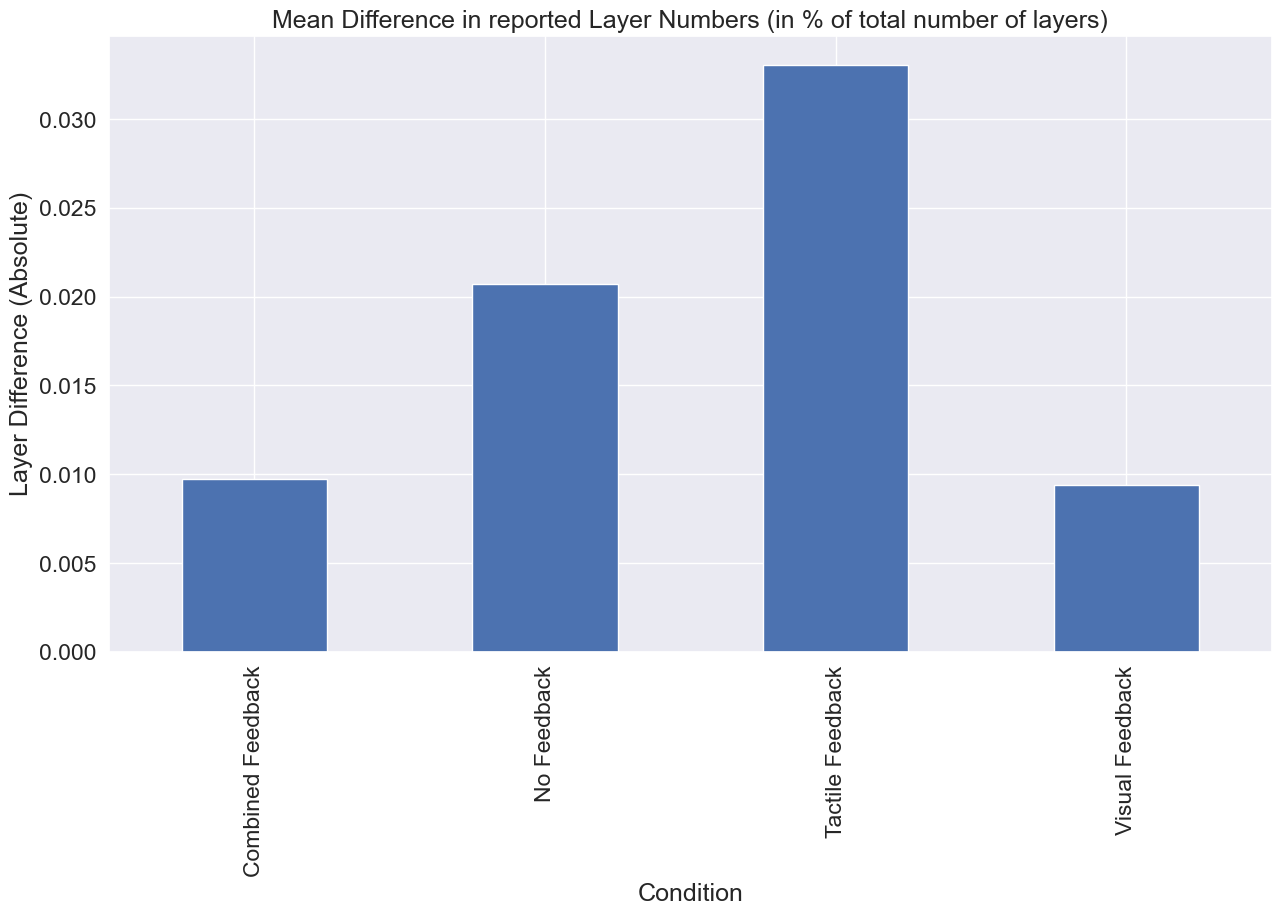

In [6]:
difference_by_condition = data_complete.groupby(["Condition"])["ResultLayerDifference"]#.unstack(level=0).fillna(0)['BlockId'].reindex(columns=condition_names).stack().unstack(level=0).reset_index()

display(difference_by_condition.describe())

fig10, ax10 = plt.subplots(figsize=(15,8))
difference_by_condition.mean().plot(x = "Condition", ax=ax10, kind="bar")

ax10.set_ylabel('Layer Difference')

plt.title('Mean Difference in reported Layer Numbers')

fig10.savefig(rf'{export_img}result_combinedCondition_layerDiffMean.png')
fig10.savefig(rf'{export_img}result_combinedCondition_layerDiffMean.svg')


data_complete['ResultLayerDifference_Abs'] = data_complete['ResultLayerDifference'].abs()
difference_by_condition2 = data_complete.groupby(["Condition"])["ResultLayerDifference_Abs"]#.unstack(level=0).fillna(0)['BlockId'].reindex(columns=condition_names).stack().unstack(level=0).reset_index()

display(difference_by_condition2.describe())

fig11, ax11 = plt.subplots(figsize=(15,8))
difference_by_condition2.mean().plot(x = "Condition", ax=ax11, kind="bar")

ax11.set_ylabel('Layer Difference (Absolute)')

plt.title('Mean (absolute) Difference in reported Layer Numbers')

fig11.savefig(rf'{export_img}result_combinedCondition_layerDiffMean_abs.png')
fig11.savefig(rf'{export_img}result_combinedCondition_layerDiffMean_abs.svg')

data_complete['ResultLayerDifference_Proz'] = data_complete['ResultLayerDifference_Abs'] / 7.0
difference_by_condition3 = data_complete.groupby(["Condition"])["ResultLayerDifference_Proz"]#.unstack(level=0).fillna(0)['BlockId'].reindex(columns=condition_names).stack().unstack(level=0).reset_index()

display(difference_by_condition3.describe())

fig12, ax12 = plt.subplots(figsize=(15,8))
difference_by_condition3.mean().plot(x = "Condition", ax=ax12, kind="bar")

ax12.set_ylabel('Layer Difference (Absolute)')

plt.title('Mean Difference in reported Layer Numbers (in % of total number of layers)')

fig12.savefig(rf'{export_img}result_combinedCondition_layerDiffMean_proz.png')
fig12.savefig(rf'{export_img}result_combinedCondition_layerDiffMean_proz.svg')

,BlockId,CommitResultDate,Condition,EndInteractionDate,ExpectedResultLayer,ExpectedResultNumber,LayerNumberConfiguration,ProbandId,ProvidedResultLayer,ProvidedResultNumber,...,ResultNumberDifference,ResultLayerDifference,ResultLayerCorrect,ResultNumberCorrect,DurationMS,DurationMS_Cleaned,countCondition,ResultLayerDifference_Abs,ResultLayerDifference_Proz,InResultLayerCorrect
0,0,2022-08-01T14:15:22.795Z,No Feedback,2022-08-01T14:15:19.119Z,5,166,"[136, 147, 130, 139, 166, 150, 132]",2,5,166,...,0,0,True,True,78.538,73.023,2,0,0.000000,0
1,0,2022-08-01T14:16:08.915Z,No Feedback,2022-08-01T14:16:03.467Z,3,165,"[122, 147, 165, 150, 129, 138, 149]",2,3,165,...,0,0,True,True,40.671,34.747,3,0,0.000000,0
2,0,2022-08-01T14:17:10.611Z,No Feedback,2022-08-01T14:17:06.246Z,5,154,"[148, 130, 142, 149, 154, 131, 147]",2,4,154,...,0,-1,False,True,57.331,54.514,4,1,0.142857,1
3,0,2022-08-01T14:18:09.619Z,No Feedback,2022-08-01T14:18:05.670Z,3,164,"[141, 132, 164, 110, 152, 147, 154]",2,3,164,...,0,0,True,True,55.058,52.633,5,0,0.000000,0
4,0,2022-08-01T14:19:06.811Z,No Feedback,2022-08-01T14:19:02.997Z,7,154,"[142, 148, 140, 143, 144, 132, 154]",2,7,154,...,0,0,True,True,53.376,50.048,6,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,3,2022-08-23T11:27:13.692Z,No Feedback,2022-08-23T11:27:09.628Z,7,159,"[153, 122, 128, 144, 140, 154, 159]",23,7,159,...,0,0,True,True,37.272,34.686,501,0,0.000000,0
1760,3,2022-08-23T11:27:49.516Z,No Feedback,2022-08-23T11:27:45.172Z,5,157,"[146, 142, 133, 156, 157, 128, 138]",23,5,157,...,0,0,True,True,31.479,29.188,502,0,0.000000,0
1761,3,2022-08-23T11:28:51.795Z,No Feedback,2022-08-23T11:28:46.148Z,6,148,"[139, 140, 143, 147, 142, 148, 141]",23,6,148,...,0,0,True,True,56.632,54.727,503,0,0.000000,0
1762,3,2022-08-23T11:29:32.908Z,No Feedback,2022-08-23T11:29:29.764Z,1,152,"[152, 139, 138, 134, 145, 144, 148]",23,1,152,...,0,0,True,True,37.968,34.835,504,0,0.000000,0


,count,mean,std,min,25%,50%,75%,max
Condition,,,,,,,,
Combined Feedback,441.0,0.018141,0.441729,-2.0,0.0,0.0,0.0,6.0
No Feedback,441.0,0.009070,0.663948,-4.0,0.0,0.0,0.0,5.0
Tactile Feedback,441.0,0.108844,0.856493,-6.0,0.0,0.0,0.0,6.0
Visual Feedback,441.0,-0.034014,0.438203,-6.0,0.0,0.0,0.0,3.0


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,441.000000,441.000000,441.000000,441.000000
mean,0.009070,0.108844,-0.034014,0.018141
std,0.663948,0.856493,0.438203,0.441729
min,-4.000000,-6.000000,-6.000000,-2.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,5.000000,6.000000,3.000000,6.000000


,0,1,2,3,4
count,441.000000,441.000000,441.000000,441.000000,1764.000000
mean,0.009070,0.108844,-0.034014,0.018141,0.025510
std,0.663948,0.856493,0.438203,0.441729,0.626441
min,-4.000000,-6.000000,-6.000000,-2.000000,-6.000000
5%,0.000000,0.000000,0.000000,0.000000,NaN
10%,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,NaN


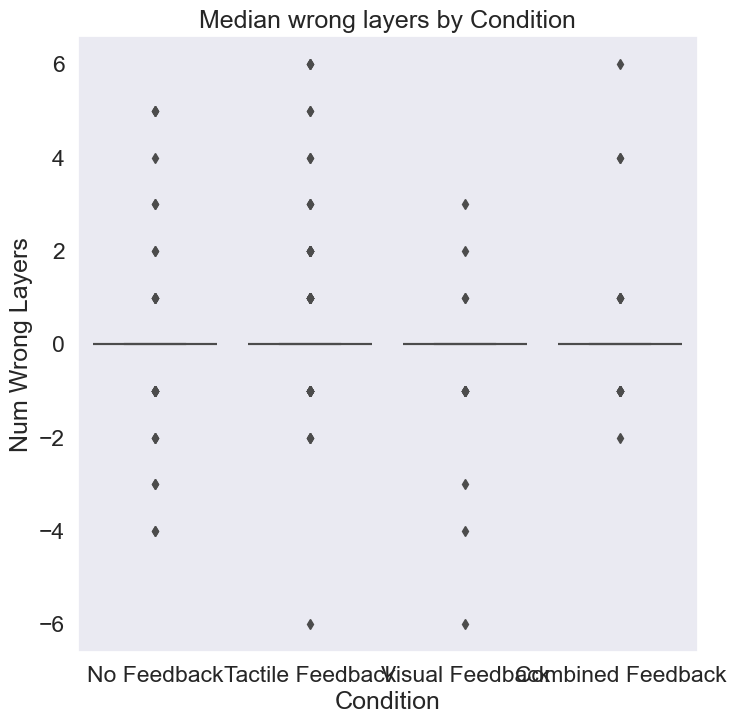

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,441.000000,441.000000,441.000000,441.000000
mean,0.145125,0.231293,0.065760,0.068027
std,0.647920,0.831767,0.434566,0.436825
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,5.000000,6.000000,6.000000,6.000000


,0,1,2,3,4
count,441.000000,441.000000,441.000000,441.000000,1764.000000
mean,0.145125,0.231293,0.065760,0.068027,0.127551
std,0.647920,0.831767,0.434566,0.436825,0.613842
min,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,NaN
10%,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,1.000000,0.000000,0.000000,NaN


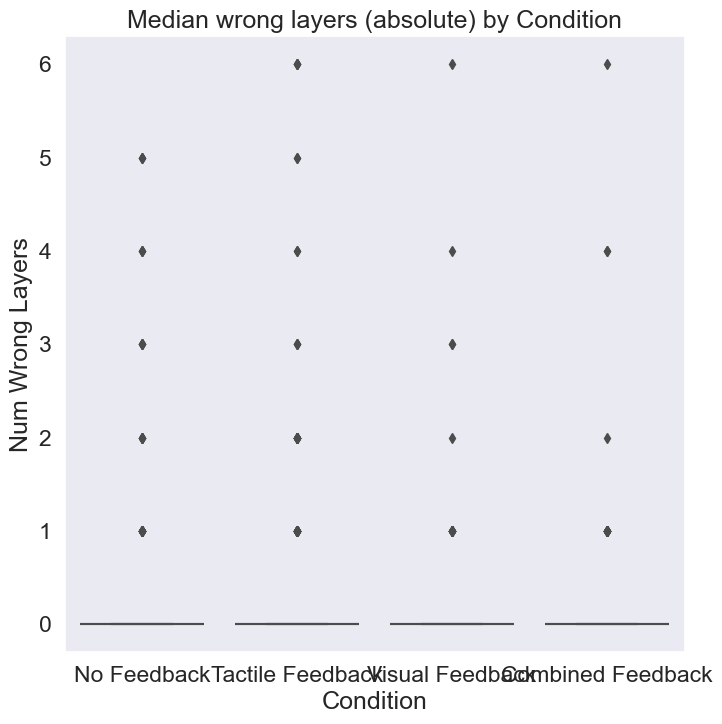

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,441.000000,441.000000,441.000000,441.000000
mean,0.020732,0.033042,0.009394,0.009718
std,0.092560,0.118824,0.062081,0.062404
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,0.714286,0.857143,0.857143,0.857143


,0,1,2,3,4
count,441.000000,441.000000,441.000000,441.000000,1764.000000
mean,0.020732,0.033042,0.009394,0.009718,0.018222
std,0.092560,0.118824,0.062081,0.062404,0.087692
min,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,NaN
10%,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.142857,0.000000,0.000000,NaN


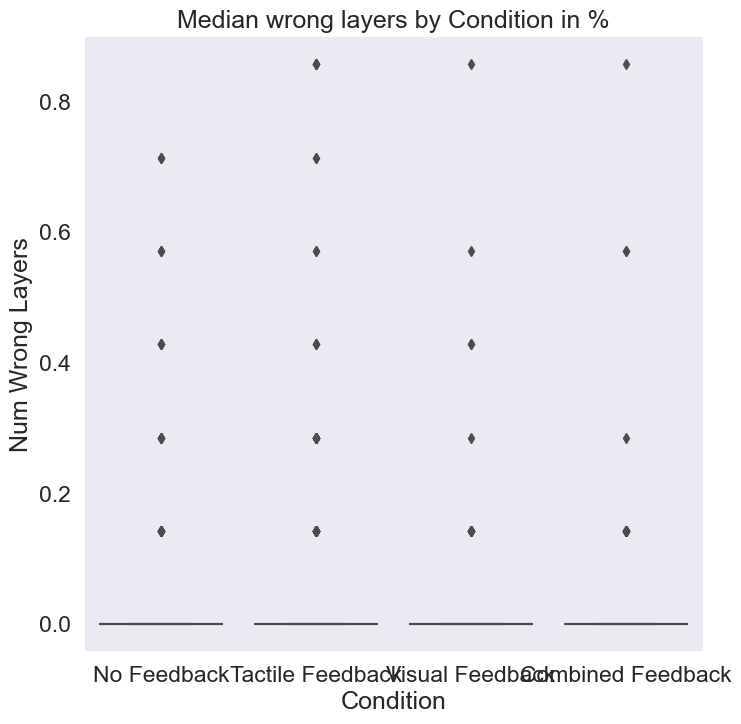

In [7]:
data_errors = data_complete
data_errors['InResultLayerCorrect'] = (~data_complete['ResultLayerCorrect']).astype(int)

display(data_errors)

grouped = data_errors.groupby('Condition')

desc = grouped['ResultLayerDifference'].describe()

display(desc)

generateBoxPlotStats(data_errors, ['Condition'], ['ProbandId','TrialNumber'], 'ResultLayerDifference', 'Condition', 'Num Wrong Layers', 'Median wrong layers by Condition', 'result_wrongLayer_Condition', True, True, True, True)
generateBoxPlotStats(data_errors, ['Condition'], ['ProbandId','TrialNumber'], 'ResultLayerDifference_Abs', 'Condition', 'Num Wrong Layers', 'Median wrong layers (absolute) by Condition', 'result_wrongLayer_Condition_abs', True, True, True, True)
generateBoxPlotStats(data_errors, ['Condition'], ['ProbandId','TrialNumber'], 'ResultLayerDifference_Proz', 'Condition', 'Num Wrong Layers', 'Median wrong layers by Condition in %', 'result_wrongLayer_Condition_proz', True, True, True, True)